In [1]:
import pandas as pd

df_2019 = pd.read_csv(r"C:\Users\albin\OneDrive\Business Project\Bidstack-April2019.CSV")

df_2025 = pd.read_csv(r"C:\Users\albin\OneDrive\Business Project\Bidstack-April2025.CSV")

In [2]:
#Checking missing values, converting to relevant format and extracting hour of the day

# Check for missing values
print(df_2019.isnull().sum())

# Convert INTERVAL_DATETIME to datetime format with dayfirst=True
df_2019['INTERVAL_DATETIME'] = pd.to_datetime(df_2019['INTERVAL_DATETIME'], dayfirst=True)

# Extract the hour of the day
df_2019['Hour'] = df_2019['INTERVAL_DATETIME'].dt.hour

# Preview to confirm
df_2019[['INTERVAL_DATETIME', 'Hour', 'Generation Type']].head()

INTERVAL_DATETIME    0
DUID                 0
PRICEBAND1           0
PRICEBAND2           0
PRICEBAND3           0
PRICEBAND4           0
PRICEBAND5           0
PRICEBAND6           0
PRICEBAND7           0
PRICEBAND8           0
PRICEBAND9           0
PRICEBAND10          0
BANDAVAIL1           0
BANDAVAIL2           0
BANDAVAIL3           0
BANDAVAIL4           0
BANDAVAIL5           0
BANDAVAIL6           0
BANDAVAIL7           0
BANDAVAIL8           0
BANDAVAIL9           0
BANDAVAIL10          0
Region               0
Generation Type      0
dtype: int64


,INTERVAL_DATETIME,Hour,Generation Type
0,2019-04-01 04:05:00,4,OCGT
1,2019-04-01 04:05:00,4,OCGT
2,2019-04-01 04:05:00,4,Black Coal
3,2019-04-01 04:05:00,4,OCGT
4,2019-04-01 04:05:00,4,Solar


In [3]:
# Check for missing values
print(df_2025.isnull().sum())

# Convert INTERVAL_DATETIME to datetime format (if needed)
df_2025['INTERVAL_DATETIME'] = pd.to_datetime(df_2025['INTERVAL_DATETIME'], dayfirst=True)

# Extract the hour of the day
df_2025['Hour'] = df_2025['INTERVAL_DATETIME'].dt.hour

# Preview to confirm
df_2025[['INTERVAL_DATETIME', 'Hour', 'Generation Type']].head()


INTERVAL_DATETIME    0
DUID                 0
PRICEBAND1           0
PRICEBAND2           0
PRICEBAND3           0
PRICEBAND4           0
PRICEBAND5           0
PRICEBAND6           0
PRICEBAND7           0
PRICEBAND8           0
PRICEBAND9           0
PRICEBAND10          0
BANDAVAIL1           0
BANDAVAIL2           0
BANDAVAIL3           0
BANDAVAIL4           0
BANDAVAIL5           0
BANDAVAIL6           0
BANDAVAIL7           0
BANDAVAIL8           0
BANDAVAIL9           0
BANDAVAIL10          0
Region               0
Generation Type      0
dtype: int64


,INTERVAL_DATETIME,Hour,Generation Type
0,2025-04-01 04:05:00,4,OCGT
1,2025-04-01 04:10:00,4,OCGT
2,2025-04-01 04:15:00,4,OCGT
3,2025-04-01 04:20:00,4,OCGT
4,2025-04-01 04:25:00,4,OCGT


In [4]:
# Calculate total MW (megawatts) offered in each bid

# List of all the 10 BANDAVAIL columns
band_columns = [f'BANDAVAIL{i}' for i in range(1, 11)]

# Create a new column that holds the total MW bid in that row
df_2019['Total_BidMW'] = df_2019[band_columns].sum(axis=1)

# Preview the result
df_2019[['INTERVAL_DATETIME', 'Generation Type', 'Hour', 'Total_BidMW']].head()

,INTERVAL_DATETIME,Generation Type,Hour,Total_BidMW
0,2019-04-01 04:05:00,OCGT,4,181
1,2019-04-01 04:05:00,OCGT,4,128
2,2019-04-01 04:05:00,Black Coal,4,385
3,2019-04-01 04:05:00,OCGT,4,47
4,2019-04-01 04:05:00,Solar,4,110


In [5]:
# Calculate total MW (megawatts) offered in each bid

# List of all the 10 BANDAVAIL columns
band_columns = [f'BANDAVAIL{i}' for i in range(1, 11)]

# Create a new column that holds the total MW bid in that row
df_2025['Total_BidMW'] = df_2025[band_columns].sum(axis=1)

# Preview the result
df_2025[['INTERVAL_DATETIME', 'Generation Type', 'Hour', 'Total_BidMW']].head()

,INTERVAL_DATETIME,Generation Type,Hour,Total_BidMW
0,2025-04-01 04:05:00,OCGT,4,65
1,2025-04-01 04:10:00,OCGT,4,65
2,2025-04-01 04:15:00,OCGT,4,65
3,2025-04-01 04:20:00,OCGT,4,65
4,2025-04-01 04:25:00,OCGT,4,65


In [6]:
# Compare total bidding behavior by generator type

# Total MW offered by each generation type
gen_totals = df_2019.groupby('Generation Type')['Total_BidMW'].sum().sort_values(ascending=False)

# Display the results
print(gen_totals)

Generation Type
Black Coal    174255705
OCGT           45846350
Solar          20170031
Name: Total_BidMW, dtype: int64


In [7]:
# Compare total bidding behavior by generator type

# Total MW offered by each generation type
gen_totals = df_2025.groupby('Generation Type')['Total_BidMW'].sum().sort_values(ascending=False)

# Display the results
print(gen_totals)

Generation Type
Black Coal    103978864
Solar          54140554
OCGT           34450184
Name: Total_BidMW, dtype: int64


In [8]:
# 2019 data
gen_totals_2019 = df_2019.groupby('Generation Type')['Total_BidMW'].sum().reset_index()
gen_totals_2019['Year'] = 2019

# 2025 data
gen_totals_2025 = df_2025.groupby('Generation Type')['Total_BidMW'].sum().reset_index()
gen_totals_2025['Year'] = 2025

# Combine into one DataFrame
combined_totals = pd.concat([gen_totals_2019, gen_totals_2025], ignore_index=True)


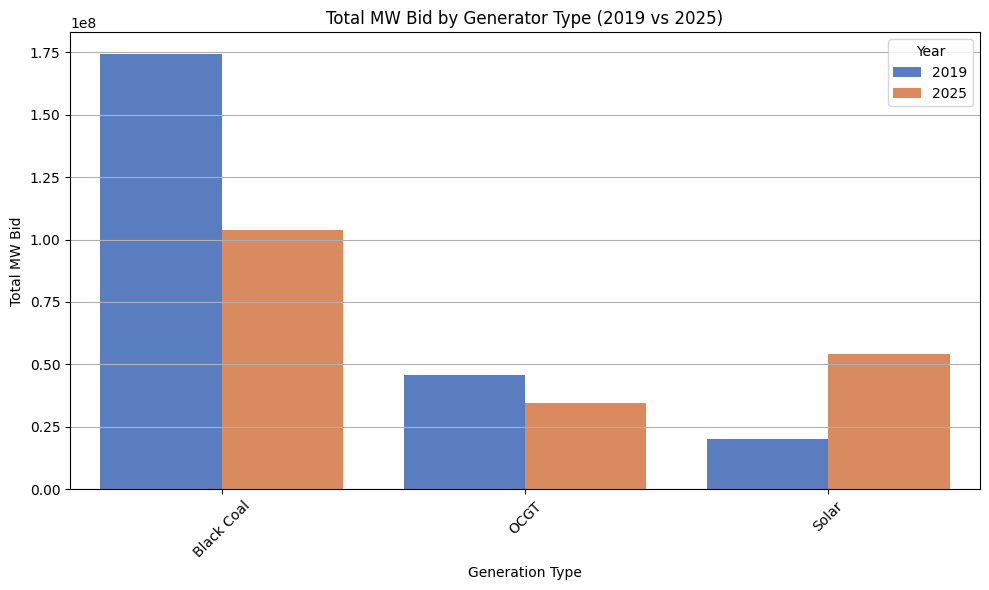

In [9]:
# Plot 1

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=combined_totals, x='Generation Type', y='Total_BidMW', hue='Year', palette='muted')

plt.title("Total MW Bid by Generator Type (2019 vs 2025)")
plt.ylabel("Total MW Bid")
plt.xlabel("Generation Type")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


The goal of this graph is to compare the total megawatt (MW) capacity bid into the electricity market by different generation types (Black Coal, OCGT, and Solar) between 2019 and 2025, in order to observe shifts in energy mix and generator participation over time.

Black Coal bids dropped sharply from ~175 million MW in 2019 to ~105 million MW in 2025, showing a decline in coal-based generation.

OCGT (gas) saw a moderate decline in bid volume, suggesting a slight reduction in its use for flexible or peaking capacity.

Solar bids surged from ~20 million MW to ~55 million MW, indicating a significant rise in solar market participation, likely due to new installations and renewables policy support.

The graph visually confirms a transition from fossil fuels to renewables, with solar becoming a more dominant player in 2025.

Overall, there's a strategic shift in capacity contribution, with conventional sources retreating and clean energy sources expanding.

In [10]:
df_2019['Year'] = 2019
df_2025['Year'] = 2025


In [11]:
# Combine both years
df_all = pd.concat([df_2019, df_2025])

# Group for average bid volume by hour, generation type, and year
df_grouped = df_all.groupby(['Hour', 'Generation Type', 'Year'])['Total_BidMW'].mean().reset_index()


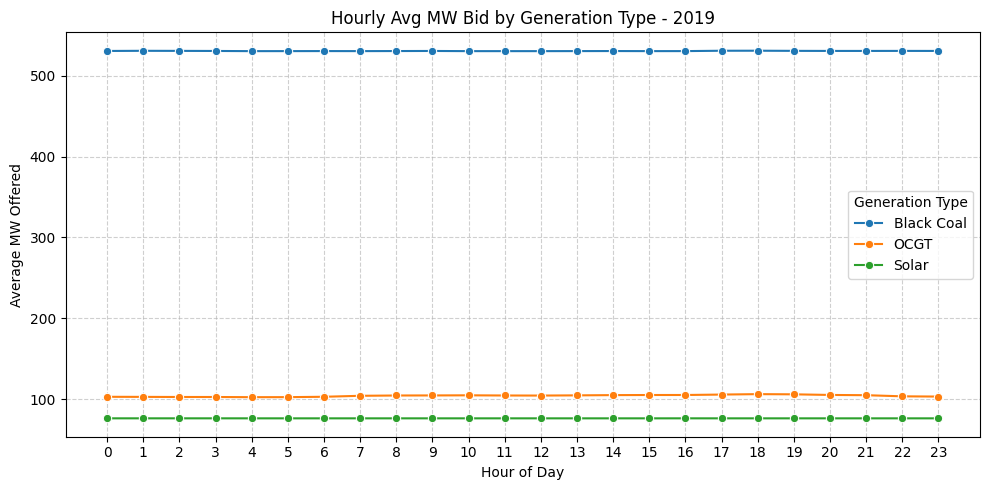

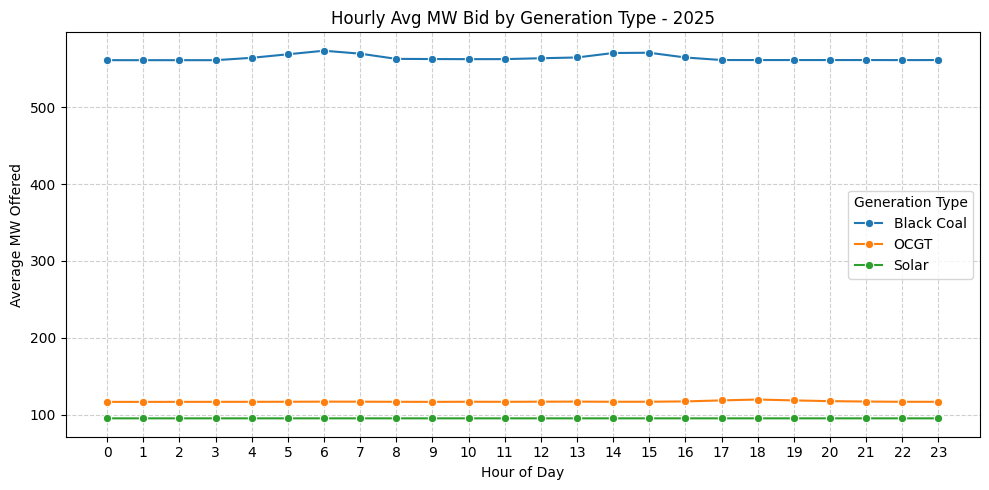

In [12]:
df_2019_plot = df_grouped[df_grouped['Year'] == 2019]
df_2025_plot = df_grouped[df_grouped['Year'] == 2025]

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_2019_plot, x='Hour', y='Total_BidMW', hue='Generation Type', marker='o')

plt.title("Hourly Avg MW Bid by Generation Type - 2019")
plt.xlabel("Hour of Day")
plt.ylabel("Average MW Offered")
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
sns.lineplot(data=df_2025_plot, x='Hour', y='Total_BidMW', hue='Generation Type', marker='o')

plt.title("Hourly Avg MW Bid by Generation Type - 2025")
plt.xlabel("Hour of Day")
plt.ylabel("Average MW Offered")
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()



The goal of this chart is to visualize how much electricity (in megawatts) each generation type (Black Coal, OCGT, Solar) offered across different hours of the day in 2019. It helps detect patterns in supply behavior across time.

Black Coal: Consistently offered the highest MW output across all 24 hours with minimal fluctuation. This reflects its role as a baseload generator, designed to run continuously.

OCGT (Open Cycle Gas Turbine): Maintained a moderate and steady level of bidding, indicating it is used as a peaking or mid-merit plant.

Solar: Surprisingly shows a flat average across all hours, which may either reflect poor aggregation of hour-wise solar data or indicate limited participation or constant low output. Solar generation should normally peak during daylight hours.

Overall: There is little intra-day variation in the plotted data. Either the averaging masked natural variability or data needs to be re-verified for hourly granularity—especially for solar where day–night changes should be more apparent.

In [13]:
# Calculate Weighted Average Bid Price Per Row 2019

# Step 1: Multiply each price band by its matching availability band
for i in range(1, 11):
    df_2019[f'weighted_price_{i}'] = df_2019[f'PRICEBAND{i}'] * df_2019[f'BANDAVAIL{i}']

# Step 2: Sum all 10 weighted prices into one column
weighted_price_cols_2019 = [f'weighted_price_{i}' for i in range(1, 11)]
df_2019['Weighted_Total_Price_2019'] = df_2019[weighted_price_cols_2019].sum(axis=1)

# Step 3: Calculate the average bid price per MW
df_2019['Average_Bid_Price_2019'] = df_2019['Weighted_Total_Price_2019'] / df_2019['Total_BidMW']

# Preview result
df_2019[['Generation Type', 'Average_Bid_Price_2019']].head()




,Generation Type,Average_Bid_Price_2019
0,OCGT,14249.150000
1,OCGT,14288.300000
2,Black Coal,1285.001299
3,OCGT,1507.583191
4,Solar,-970.000000


In [14]:
# Calculate Weighted Average Bid Price Per Row for 2025

# Step 1: Multiply each price band by its matching availability band
for i in range(1, 11):
    df_2025[f'weighted_price_{i}'] = df_2025[f'PRICEBAND{i}'] * df_2025[f'BANDAVAIL{i}']

# Step 2: Sum all 10 weighted prices into one column
weighted_price_cols_2025 = [f'weighted_price_{i}' for i in range(1, 11)]
df_2025['Weighted_Total_Price_2025'] = df_2025[weighted_price_cols_2025].sum(axis=1)

# Step 3: Calculate the average bid price per MW
df_2025['Average_Bid_Price_2025'] = df_2025['Weighted_Total_Price_2025'] / df_2025['Total_BidMW']

# Preview result
df_2025[['Generation Type', 'Average_Bid_Price_2025']].head()

,Generation Type,Average_Bid_Price_2025
0,OCGT,17130.75
1,OCGT,17130.75
2,OCGT,17130.75
3,OCGT,17130.75
4,OCGT,17130.75


In [15]:
df_2025

,INTERVAL_DATETIME,DUID,PRICEBAND1,PRICEBAND2,PRICEBAND3,PRICEBAND4,PRICEBAND5,PRICEBAND6,PRICEBAND7,PRICEBAND8,...,weighted_price_3,weighted_price_4,weighted_price_5,weighted_price_6,weighted_price_7,weighted_price_8,weighted_price_9,weighted_price_10,Weighted_Total_Price_2025,Average_Bid_Price_2025
0,2025-04-01 04:05:00,JLA02,-978.9,0.00,177.14,245.60,279.93,587.23,1370.42,14145.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1113498.75,1113498.75,17130.75
1,2025-04-01 04:10:00,JLA02,-978.9,0.00,177.14,245.60,279.93,587.23,1370.42,14145.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1113498.75,1113498.75,17130.75
2,2025-04-01 04:15:00,JLA02,-978.9,0.00,177.14,245.60,279.93,587.23,1370.42,14145.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1113498.75,1113498.75,17130.75
3,2025-04-01 04:20:00,JLA02,-978.9,0.00,177.14,245.60,279.93,587.23,1370.42,14145.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1113498.75,1113498.75,17130.75
4,2025-04-01 04:25:00,JLA02,-978.9,0.00,177.14,245.60,279.93,587.23,1370.42,14145.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1113498.75,1113498.75,17130.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2025-04-20 00:55:00,QPS1,-994.9,140.28,198.98,300.46,3471.20,9401.81,12137.77,15370.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,504911.75,504911.75,17410.75
1048571,2025-04-20 01:00:00,QPS1,-994.9,140.28,198.98,300.46,3471.20,9401.81,12137.77,15370.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,504911.75,504911.75,17410.75
1048572,2025-04-20 01:05:00,QPS1,-994.9,140.28,198.98,300.46,3471.20,9401.81,12137.77,15370.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,504911.75,504911.75,17410.75
1048573,2025-04-20 01:10:00,QPS1,-994.9,140.28,198.98,300.46,3471.20,9401.81,12137.77,15370.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,504911.75,504911.75,17410.75


In [16]:
# Compare Average Bid Price by Generation Type 2019

# Group by generation type and get average of average bid price
avg_price_by_type_2019 = df_2019.groupby('Generation Type')['Average_Bid_Price_2019'].mean().sort_values()

print(avg_price_by_type_2019)


# Compare Average Bid Price by Generation Type 2025

# Group by generation type and get average of average bid price
avg_price_by_type_2025 = df_2025.groupby('Generation Type')['Average_Bid_Price_2025'].mean().sort_values()

print(avg_price_by_type_2025)


Generation Type
Solar           107.906977
Black Coal     2026.350886
OCGT          11854.131480
Name: Average_Bid_Price_2019, dtype: float64
Generation Type
Solar           -47.811137
Black Coal     3539.684767
OCGT          15471.179897
Name: Average_Bid_Price_2025, dtype: float64


In [17]:
# Reset index to avoid errors
avg_price_by_type_2019 = avg_price_by_type_2019.reset_index()
avg_price_by_type_2025 = avg_price_by_type_2025.reset_index()

# Add Year column
avg_price_by_type_2019['Year'] = 2019
avg_price_by_type_2025['Year'] = 2025

# Rename column to match both DataFrames
avg_price_by_type_2019.rename(columns={'Average_Bid_Price_2019': 'Avg_Bid_Price'}, inplace=True)
avg_price_by_type_2025.rename(columns={'Average_Bid_Price_2025': 'Avg_Bid_Price'}, inplace=True)

# Combine both
avg_price_both = pd.concat([avg_price_by_type_2019, avg_price_by_type_2025], ignore_index=True)


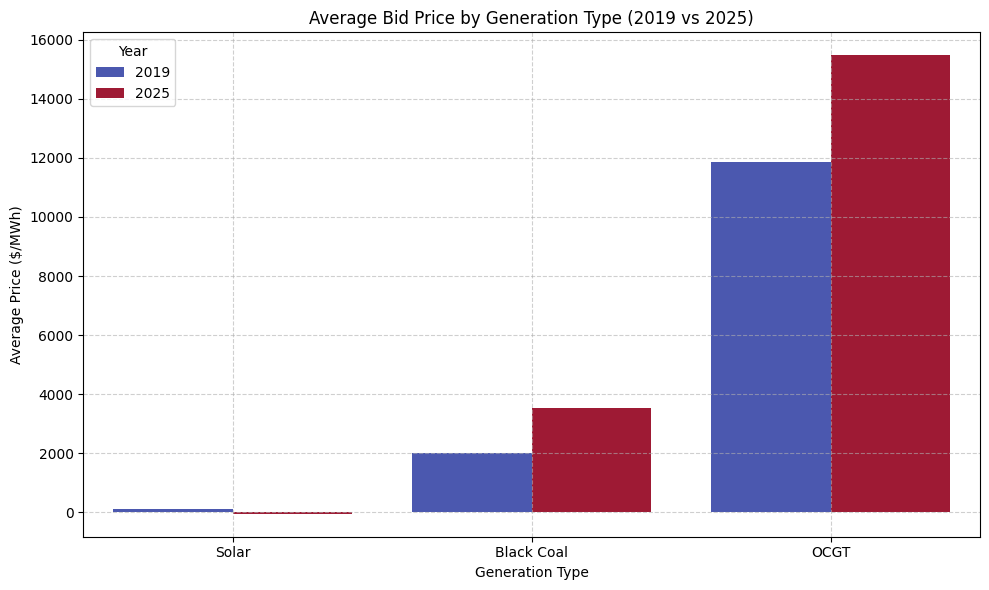

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(
    data=avg_price_both,
    x='Generation Type',
    y='Avg_Bid_Price',
    hue='Year',
    palette='coolwarm'
)

plt.title("Average Bid Price by Generation Type (2019 vs 2025)")
plt.ylabel("Average Price ($/MWh)")
plt.xlabel("Generation Type")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


This graph compares the average bid prices by generation type (Solar, Black Coal, OCGT) between 2019 and 2025. The aim is to highlight shifts in pricing strategies or market conditions over time for each technology.

Solar: Average bid price slightly dropped from a small positive value to negative, suggesting more aggressive or subsidized bidding in 2025, potentially due to renewable penetration or policy incentives.

Black Coal: Increased average bid price from around $2,000/MWh to $3,500/MWh, showing a notable cost rise—possibly due to fuel price increases, aging infrastructure, or emissions penalties.

OCGT: Saw the largest jump, from roughly $11,800/MWh to $15,500/MWh, indicating either higher operating costs or a strategic move to target peak periods with premium pricing.

Overall: The shift signals that dispatchable generators (Black Coal, OCGT) are responding to market or regulatory changes, while solar is possibly over-supplying at lower or negative prices to stay competitive.

In [19]:
# Sum total MW for each generation type per year
volume_2019 = df_2019.groupby('Generation Type')['Total_BidMW'].sum().reset_index()
volume_2019['Year'] = 2019

volume_2025 = df_2025.groupby('Generation Type')['Total_BidMW'].sum().reset_index()
volume_2025['Year'] = 2025

# Combine both
volume_df = pd.concat([volume_2019, volume_2025], ignore_index=True)


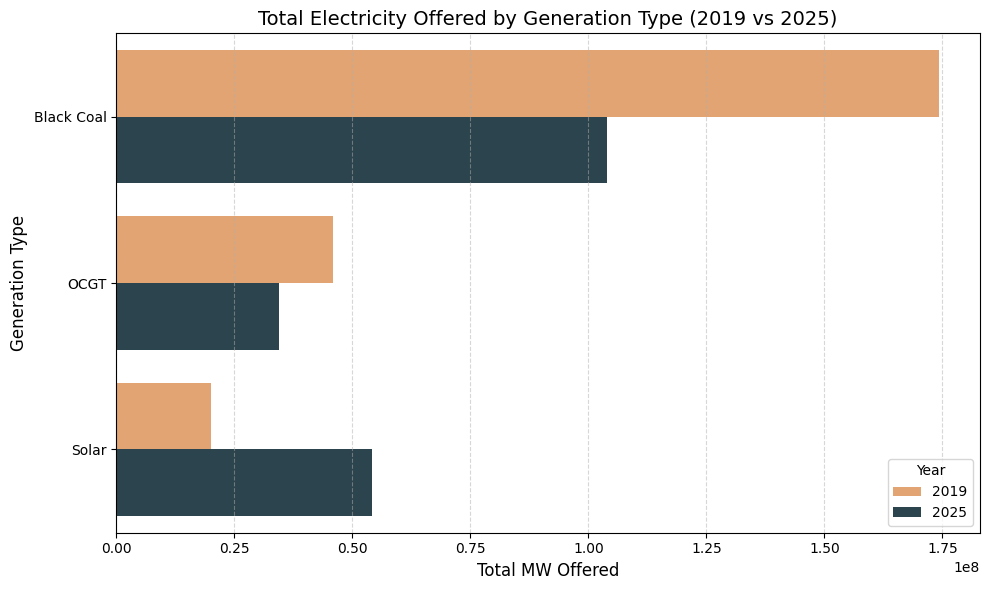

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=volume_df,
    y='Generation Type',
    x='Total_BidMW',
    hue='Year',
    palette={2019: "#F4A261", 2025: "#264653"},
    orient='h'
)

plt.title('Total Electricity Offered by Generation Type (2019 vs 2025)', fontsize=14)
plt.xlabel('Total MW Offered', fontsize=12)
plt.ylabel('Generation Type', fontsize=12)
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


This graph illustrates the total electricity (MW) offered by each generation type—Black Coal, OCGT, and Solar—for the years 2019 and 2025. It helps compare how the supply contribution from each generator category has changed over time.

Black Coal: Saw a drop in total MW offered from 2019 to 2025, signaling reduced generation capacity or a strategic retreat in bidding—possibly due to policy pressure or fuel constraints.

OCGT (Open Cycle Gas Turbine): Also experienced a decline in total MW, which may reflect higher fuel costs or decreased competitiveness in the market.

Solar: Significantly increased its electricity contribution, surpassing OCGT in 2025. This growth aligns with increased renewable deployment and falling solar costs.

Overall Trend: There's a clear shift from fossil fuels toward renewable generation between 2019 and 2025, hinting at a structural transition in the energy market.

In [21]:
# Add year column if not present
df_2019['Year'] = 2019
df_2025['Year'] = 2025

# Only keep necessary columns
df_box_2019 = df_2019[['Generation Type', 'Average_Bid_Price_2019', 'Year']]
df_box_2025 = df_2025[['Generation Type', 'Average_Bid_Price_2025', 'Year']]

# Combine
df_box_all = pd.concat([df_box_2019, df_box_2025], ignore_index=True)


C:\Users\albin\AppData\Local\Temp\ipykernel_14300\4095944342.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


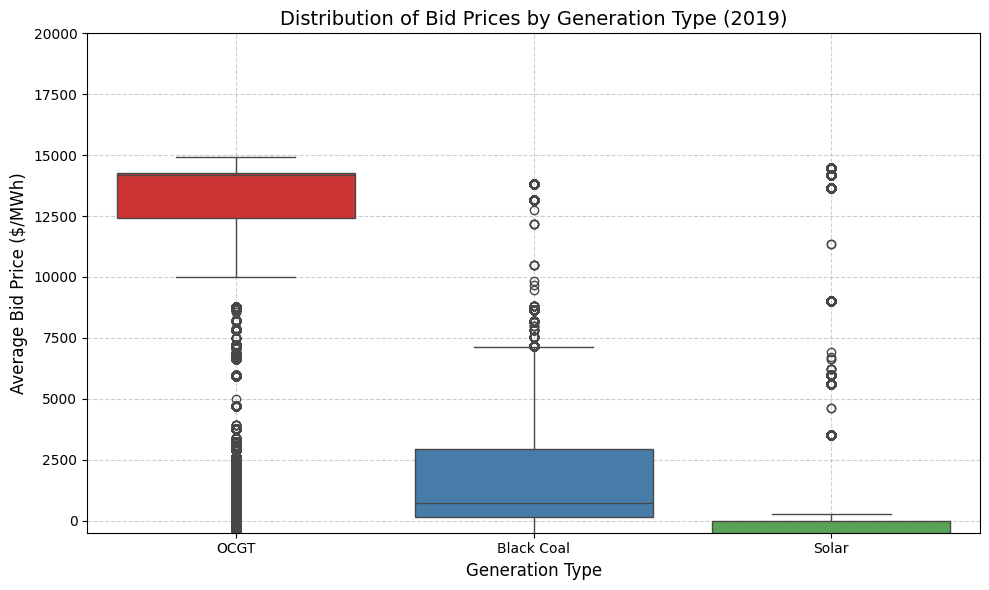

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_box_2019,
    x='Generation Type',
    y='Average_Bid_Price_2019',
    palette='Set1'
)

plt.title('Distribution of Bid Prices by Generation Type (2019)', fontsize=14)
plt.ylabel('Average Bid Price ($/MWh)', fontsize=12)
plt.xlabel('Generation Type', fontsize=12)
plt.ylim(-500, 20000)  # Optional: adjust as needed
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



C:\Users\albin\AppData\Local\Temp\ipykernel_14300\363215208.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


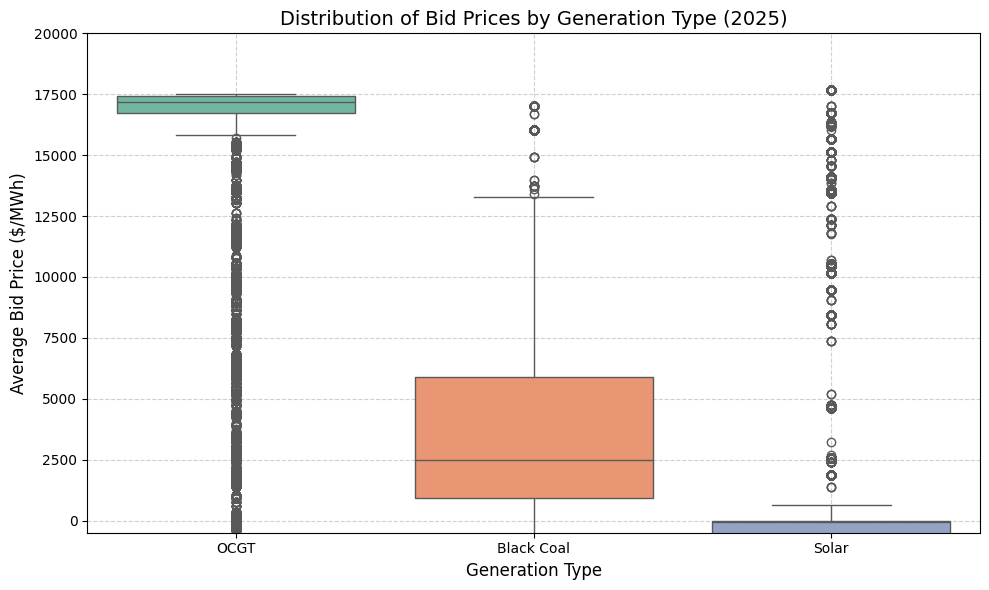

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_box_2025,
    x='Generation Type',
    y='Average_Bid_Price_2025',
    palette='Set2'
)

plt.title('Distribution of Bid Prices by Generation Type (2025)', fontsize=14)
plt.ylabel('Average Bid Price ($/MWh)', fontsize=12)
plt.xlabel('Generation Type', fontsize=12)
plt.ylim(-500, 20000)  # Match scale with 2019 for comparison
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


The boxplots aim to visualize the variability and central tendency of bid prices for different generator types (Solar, Black Coal, OCGT) in 2019 and 2025, highlighting how bidding strategies have evolved over time.

OCGT (Open Cycle Gas Turbine) shows high average bid prices in both years, but in 2025, the bids became more clustered around higher values, indicating less pricing flexibility and a stronger peaking behavior.

Black Coal shows increased price volatility in 2025, with wider spread and more high outliers. This may suggest growing uncertainty or more aggressive bidding due to market changes or operational constraints.

Solar bids, which had a tighter range and lower prices in 2019, now show a wider and more erratic price spread in 2025. This could reflect a shift in market dynamics, such as subsidy changes or higher competition in the renewable sector.

Overall, the plots show that price dispersion has generally increased, especially for Black Coal and Solar, suggesting that market conditions in 2025 may be more volatile or strategic than in 2019.

In [24]:
def prepare_supply_curve(df, year):
    price_cols = [f'PRICEBAND{i}' for i in range(1, 11)]
    volume_cols = [f'BANDAVAIL{i}' for i in range(1, 11)]

    melted = df[['Generation Type'] + price_cols + volume_cols].copy()

    melted_price = pd.melt(melted, id_vars='Generation Type', value_vars=price_cols,
                           var_name='Band', value_name='Price')
    melted_volume = pd.melt(melted, id_vars='Generation Type', value_vars=volume_cols,
                            var_name='Band', value_name='MW')

    melted_price['MW'] = melted_volume['MW']
    melted_price['Year'] = year
    melted_price = melted_price.dropna()

    grouped = melted_price.groupby(['Generation Type', 'Price', 'Year'])['MW'].sum().reset_index()
    grouped = grouped.sort_values(['Generation Type', 'Price'])
    grouped['Cumulative_MW'] = grouped.groupby(['Generation Type', 'Year'])['MW'].cumsum()

    return grouped

supply_2019 = prepare_supply_curve(df_2019, 2019)
supply_2025 = prepare_supply_curve(df_2025, 2025)

supply_all = pd.concat([supply_2019, supply_2025], ignore_index=True)



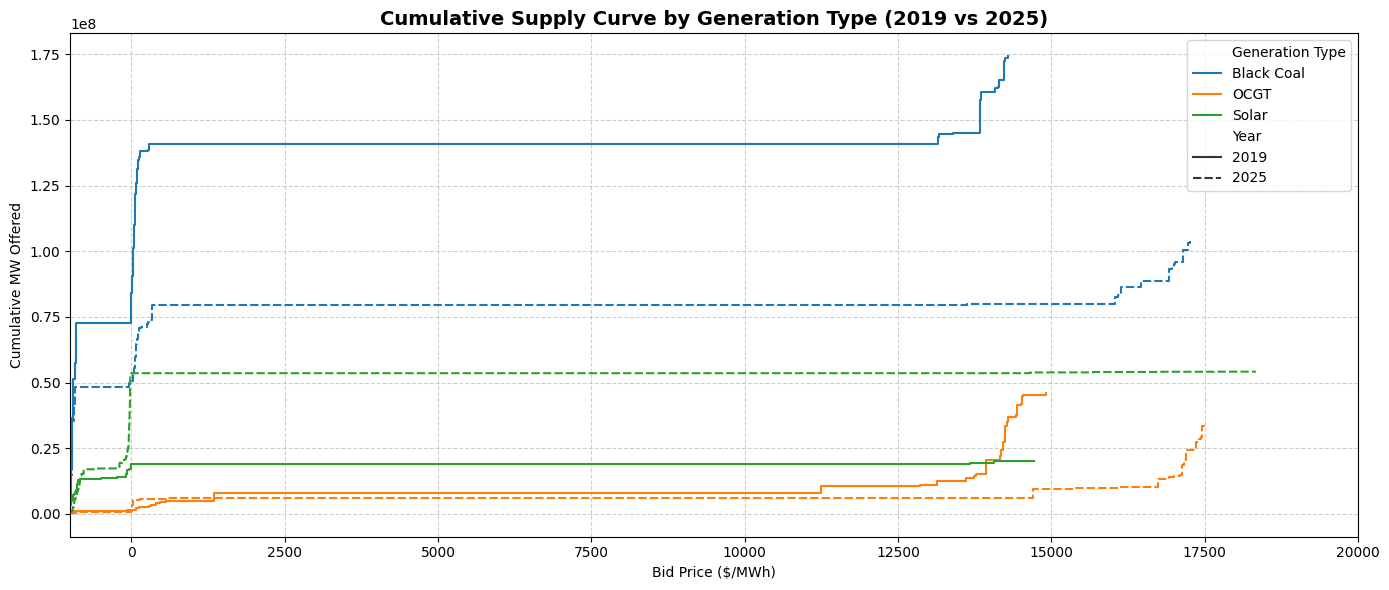

In [25]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=supply_all, x='Price', y='Cumulative_MW',
             hue='Generation Type', style='Year', drawstyle='steps-post')

plt.title('Cumulative Supply Curve by Generation Type (2019 vs 2025)', fontsize=14, fontweight='bold')
plt.xlabel('Bid Price ($/MWh)')
plt.ylabel('Cumulative MW Offered')
plt.xlim(-1000, 20000)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


The graph shows the cumulative MW offered by each generation type (Black Coal, OCGT, Solar) plotted against bid price ($/MWh) for 2019 (solid lines) and 2025 (dashed lines). It helps analyze how much electricity each generator is willing to supply at different price levels, offering insight into market behavior, cost structures, and bidding strategy shifts over time.

Black Coal:

In 2019, Black Coal offered a larger total capacity, primarily at lower bid prices, suggesting cost-effectiveness and a base-load strategy.

In 2025, the total capacity is lower, and the bids are more evenly spread, hinting at less aggressive pricing and possible cost pressure or policy shifts.

OCGT:

OCGT bids are concentrated in higher price bands in both years, reflecting their role as peaking generators.

In 2025, the bid curve is flatter but higher, suggesting increased marginal costs or less frequent usage.

Solar:

Solar offers a similar cumulative capacity in both years but appears slightly more spread across lower bid prices in 2025.

This indicates a stronger role in supplying low-cost energy, likely supported by policy or technological improvements.

Market Behavior Shift:

Overall, 2019 supply curves are steeper, especially for Black Coal and OCGT, showing quick capacity commitments at specific prices.

In 2025, supply curves are more gradual and diversified, which may reflect strategic bidding, renewable integration, and market competition.

In [26]:
def calculate_vwap(df, price_col, year):
    df = df.copy()
    df['Price_x_Volume'] = df[price_col] * df['Total_BidMW']
    vwap = df.groupby('Generation Type').agg({
        'Price_x_Volume': 'sum',
        'Total_BidMW': 'sum'
    })
    vwap['VWAP'] = vwap['Price_x_Volume'] / vwap['Total_BidMW']
    vwap = vwap[['VWAP']].reset_index()
    vwap['Year'] = year
    return vwap

# Run for both years
vwap_2019 = calculate_vwap(df_2019, 'Average_Bid_Price_2019', 2019)
vwap_2025 = calculate_vwap(df_2025, 'Average_Bid_Price_2025', 2025)

# Combine for visual comparison
vwap_all = pd.concat([vwap_2019, vwap_2025], ignore_index=True)


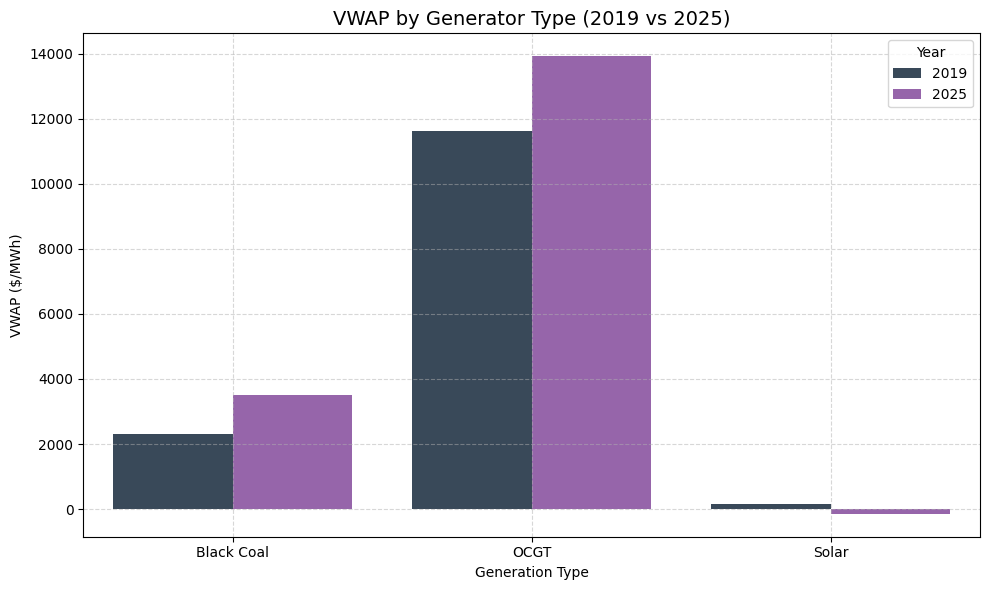

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

custom_palette = {
    2019: "#34495e",  # dark navy
    2025: "#9b59b6",  # purple
}
plt.figure(figsize=(10, 6))
sns.barplot(
    data=vwap_all,
    x='Generation Type',
    y='VWAP',
    hue='Year',
    palette=custom_palette
)

plt.title('VWAP by Generator Type (2019 vs 2025)', fontsize=14)
plt.ylabel('VWAP ($/MWh)')
plt.xlabel('Generation Type')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


The chart shows the Volume-Weighted Average Price (VWAP) for each generation type—Black Coal, OCGT, and Solar—in 2019 and 2025. VWAP reflects the average price at which electricity was actually bid weighted by volume (MW), offering a clearer sense of effective bidding behavior in the market.

OCGT (Open Cycle Gas Turbine):

VWAP increased significantly from ~11,600 to ~13,900 $/MWh.

Suggests higher marginal costs or more strategic high-price bidding in 2025, likely due to fuel volatility or capacity payments.

Black Coal:

VWAP rose from ~2,300 to ~3,500 $/MWh.

Indicates cost pressure or tighter supply, possibly driven by carbon pricing or retirement of legacy assets.

Solar:

VWAP dropped below zero in 2025, from a small positive in 2019 to negative.

This shows aggressive negative bidding, possibly to stay dispatched under renewable energy subsidies or market incentives.

In [28]:
def compute_hourly_vwap(df, avg_price_col, year):
    df = df.copy()
    df['Hour'] = pd.to_datetime(df['INTERVAL_DATETIME']).dt.hour
    df['Price_x_Volume'] = df[avg_price_col] * df['Total_BidMW']

    vwap_hourly = df.groupby(['Hour', 'Generation Type']).agg({
        'Price_x_Volume': 'sum',
        'Total_BidMW': 'sum'
    }).reset_index()

    vwap_hourly['VWAP'] = vwap_hourly['Price_x_Volume'] / vwap_hourly['Total_BidMW']
    vwap_hourly['Year'] = year
    return vwap_hourly
vwap_2019_hourly = compute_hourly_vwap(df_2019, 'Average_Bid_Price_2019', 2019)
vwap_2025_hourly = compute_hourly_vwap(df_2025, 'Average_Bid_Price_2025', 2025)

# Combine both for comparison
vwap_both = pd.concat([vwap_2019_hourly, vwap_2025_hourly], ignore_index=True)


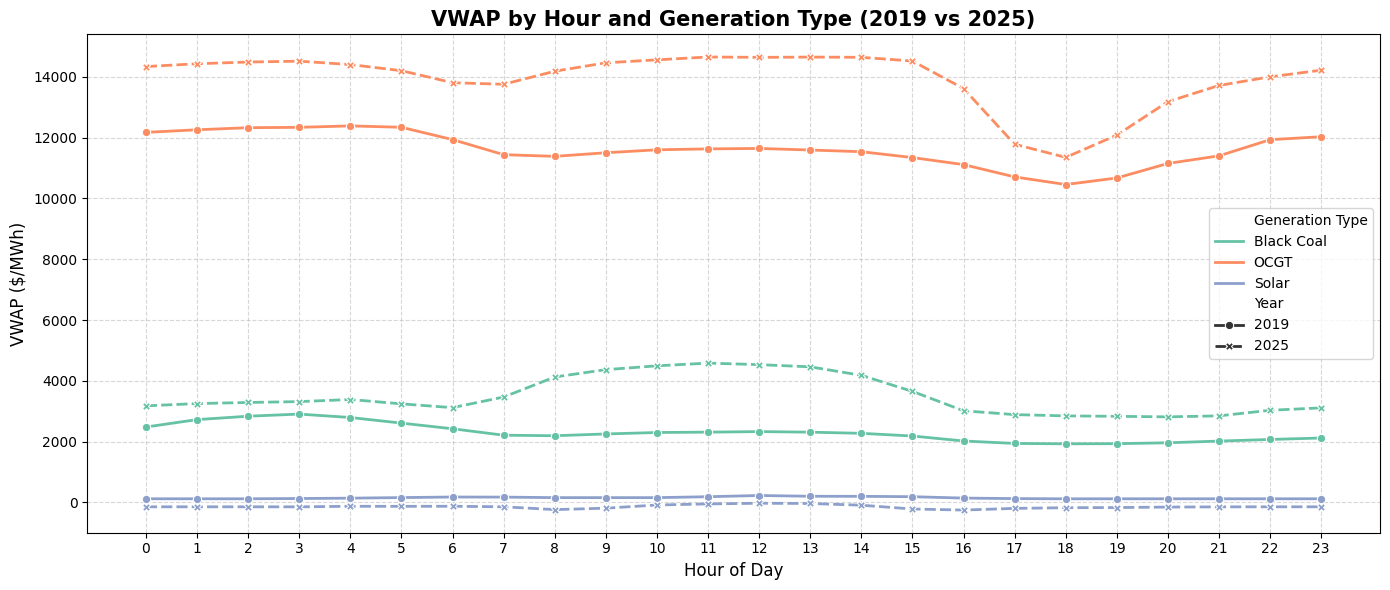

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.lineplot(
    data=vwap_both,
    x='Hour',
    y='VWAP',
    hue='Generation Type',
    style='Year',
    markers=True,
    dashes=True,
    linewidth=2,
    palette='Set2'
)

plt.title('VWAP by Hour and Generation Type (2019 vs 2025)', fontsize=15, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('VWAP ($/MWh)', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


This line chart compares VWAP (Volume-Weighted Average Price) by hour of the day and generation type for the years 2019 and 2025. It captures intra-day price behavior and how it changes across time and generation technologies.

OCGT (Orange Line):

Consistently the highest VWAP across all hours.

Slight increase in peak hour prices (11–13h) in 2025 vs 2019, showing aggressive peak-time bidding.

Dips during late evening, suggesting less reliance or reduced pricing in off-peak periods.

Black Coal (Green Line):

More stable across hours, but higher in 2025, especially mid-day.

Peak price behavior is visible around 9–13h in 2025, reflecting costlier generation or reduced availability.

Solar (Blue Line):

VWAP in 2019 is slightly positive; in 2025 it's negative or near zero, especially during daylight hours (10–16h).

Indicates heavier negative bidding during high solar output hours, possibly driven by subsidy-driven dispatch or curtailment avoidance.

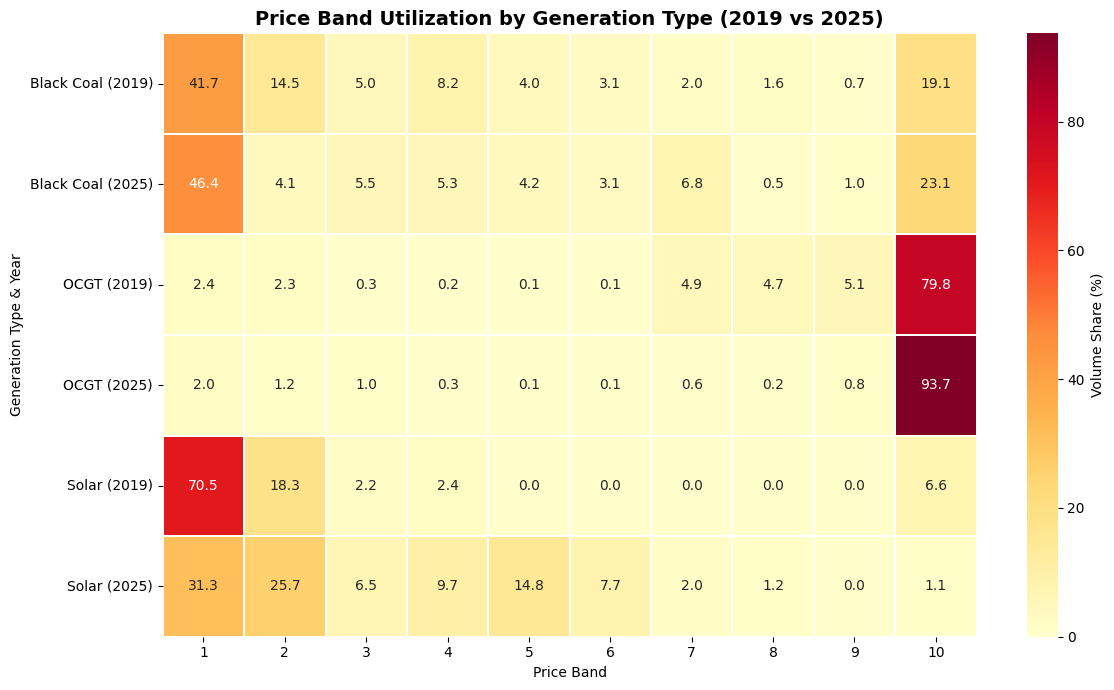

In [30]:
def compute_band_utilization(df, year):
    band_cols = [f'BANDAVAIL{i}' for i in range(1, 11)]
    melted = df[['Generation Type'] + band_cols].copy()

    melted = pd.melt(
        melted,
        id_vars='Generation Type',
        value_vars=band_cols,
        var_name='Band',
        value_name='MW'
    )
    
    melted['Band'] = melted['Band'].str.extract(r'(\d+)').astype(int)
    band_util = melted.groupby(['Generation Type', 'Band'])['MW'].sum().reset_index()
    band_util['Volume Share (%)'] = band_util.groupby('Generation Type')['MW'].transform(lambda x: 100 * x / x.sum())
    band_util['Year'] = year
    return band_util
band_2019 = compute_band_utilization(df_2019, 2019)
band_2025 = compute_band_utilization(df_2025, 2025)

band_all = pd.concat([band_2019, band_2025], ignore_index=True)

# Combine Generation Type + Year for row labels
band_all['Gen_Year'] = band_all['Generation Type'] + ' (' + band_all['Year'].astype(str) + ')'
import matplotlib.pyplot as plt
import seaborn as sns

# Pivot to wide format
heatmap_data = band_all.pivot(index='Gen_Year', columns='Band', values='Volume Share (%)')

# Plot
plt.figure(figsize=(12, 7))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap="YlOrRd",
    linewidths=0.3,
    cbar_kws={'label': 'Volume Share (%)'}
)

plt.title('Price Band Utilization by Generation Type (2019 vs 2025)', fontsize=14, fontweight='bold')
plt.xlabel('Price Band')
plt.ylabel('Generation Type & Year')
plt.tight_layout()
plt.show()


This heatmap shows how each generator type (Black Coal, OCGT, Solar) utilized the 10 price bands (from lowest to highest) in 2019 and 2025, expressed as the percentage share of total bid volume in each band.

Black Coal:

In both years, it favors lower bands—especially Band 1 (41.7% in 2019 → 46.4% in 2025).

Moderate increase in high-price band (Band 10) use: 19.1% → 23.1%, suggesting more strategic high-end bids in 2025.

OCGT:

OCGT strongly prefers Band 10, already at 79.8% in 2019, rising to 93.7% in 2025.

Minimal use of low to mid bands—indicating a peaking strategy focused on expensive, last-resort dispatch.

Solar:

Huge shift observed: in 2019, 70.5% of solar bids were in Band 1, dropping to 31.3% in 2025.

Greater spread across Bands 2 to 6, indicating solar is no longer just negative or zero-priced—more nuanced bidding behavior, possibly influenced by market signals or reduced curtailment pressure.

This chart visualizes the strategic evolution of bid placement across price bands. The shift of Solar away from Band 1 and the entrenchment of OCGT in Band 10 show how generator behaviors are adapting to new market conditions, competition, and possibly policy signals in 2025.

#Task 4 

In [31]:
avg_price_both

,Generation Type,Avg_Bid_Price,Year
0,Solar,107.906977,2019
1,Black Coal,2026.350886,2019
2,OCGT,11854.131480,2019
3,Solar,-47.811137,2025
4,Black Coal,3539.684767,2025
5,OCGT,15471.179897,2025


In [32]:
# 1. Change in Bid Price Distribution (Delta Plot or Dumbbell Plot)

# Pivot the data to create one row per Generation Type
pivot_df = avg_price_both.pivot(index='Generation Type', columns='Year', values='Avg_Bid_Price').reset_index()
pivot_df.columns.name = None  # remove columns name to tidy up
pivot_df['Delta'] = pivot_df[2025] - pivot_df[2019]


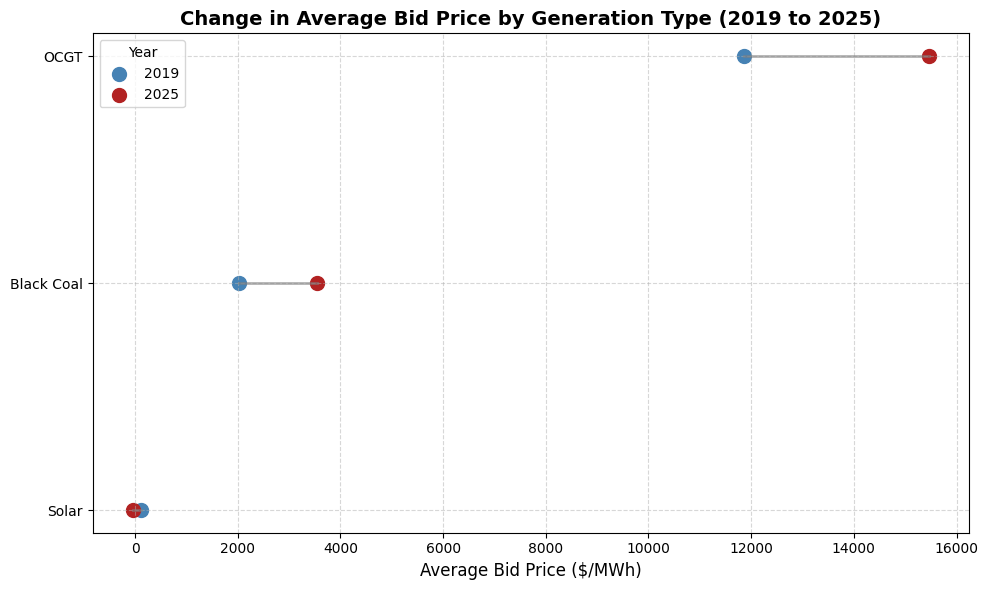

In [33]:
import matplotlib.pyplot as plt

# Sort by 2025 values for a cleaner visual
pivot_df.sort_values(by=2025, inplace=True)

plt.figure(figsize=(10, 6))

# Plot lines
for _, row in pivot_df.iterrows():
    plt.plot([row[2019], row[2025]], [row['Generation Type']] * 2, color='gray', linewidth=2, alpha=0.6)

# Plot circles for 2019
plt.scatter(pivot_df[2019], pivot_df['Generation Type'], color='steelblue', s=100, label='2019')

# Plot circles for 2025
plt.scatter(pivot_df[2025], pivot_df['Generation Type'], color='firebrick', s=100, label='2025')

# Add labels and legend
plt.title('Change in Average Bid Price by Generation Type (2019 to 2025)', fontsize=14, fontweight='bold')
plt.xlabel('Average Bid Price ($/MWh)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Year')
plt.tight_layout()
plt.show()





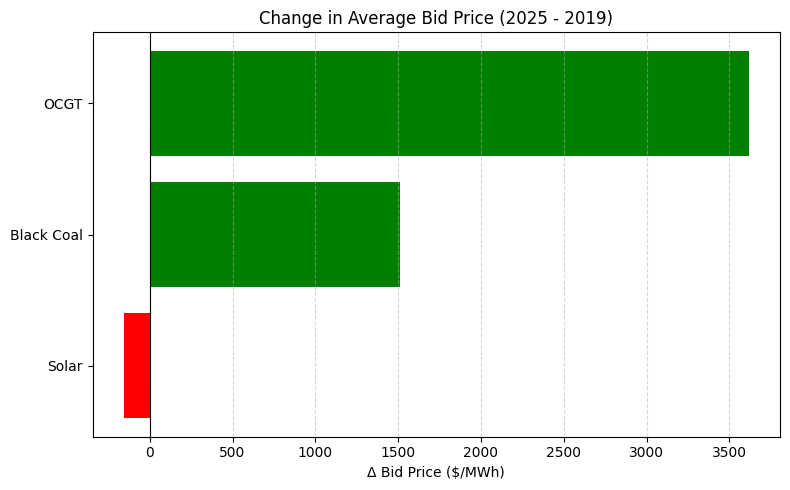

In [34]:
df_delta = pivot_df.copy()
df_delta['Delta'] = df_delta[2025] - df_delta[2019]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.barh(
    df_delta['Generation Type'],
    df_delta['Delta'],
    color=['green' if x > 0 else 'red' for x in df_delta['Delta']]
)
plt.axvline(0, color='black', linewidth=0.8)
plt.title("Change in Average Bid Price (2025 - 2019)")
plt.xlabel("Δ Bid Price ($/MWh)")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


The goal of this graph is to compare how the average bid prices have shifted for each generation type (Solar, Black Coal, OCGT) from 2019 to 2025. This helps identify which technologies have become more expensive or cheaper to dispatch and reflects changes in market positioning, fuel costs, or strategy over time.

OCGT (Open Cycle Gas Turbines) saw the largest increase in average bid price, rising from ~$11,800/MWh in 2019 to ~$15,500/MWh in 2025, signaling either higher marginal costs or aggressive pricing during peak hours.

Black Coal also recorded a significant rise, from around ~$2,000 to ~$3,500/MWh, suggesting greater reliance on coal at higher cost levels or reduced availability at lower price bands.

Solar shifted in the opposite direction: its average bid price decreased, possibly due to higher penetration, zero marginal cost, or strategic underbidding to remain competitive.

The arrow plot visually confirms the direction and magnitude of price movement, while the bar chart clearly emphasizes who moved the most and in what direction.

Overall, the graph illustrates a strategic market shift: gas and coal are bidding higher, likely due to increased cost or reduced competition, while solar remains the cheapest and most stable source.

In [35]:
#  3. Load Duration Curve

# Combine both years
df_2019['Year'] = 2019
df_2025['Year'] = 2025

# Select only total MW offered and year
df_ldc_2019 = df_2019[['Total_BidMW', 'Year']].copy()
df_ldc_2025 = df_2025[['Total_BidMW', 'Year']].copy()

# Concatenate
df_ldc = pd.concat([df_ldc_2019, df_ldc_2025], ignore_index=True)

# Remove invalid or zero values
df_ldc = df_ldc[df_ldc['Total_BidMW'] > 0]

# Sort MW from highest to lowest within each year
df_ldc['Rank'] = df_ldc.groupby('Year')['Total_BidMW'].rank(method='first', ascending=False)


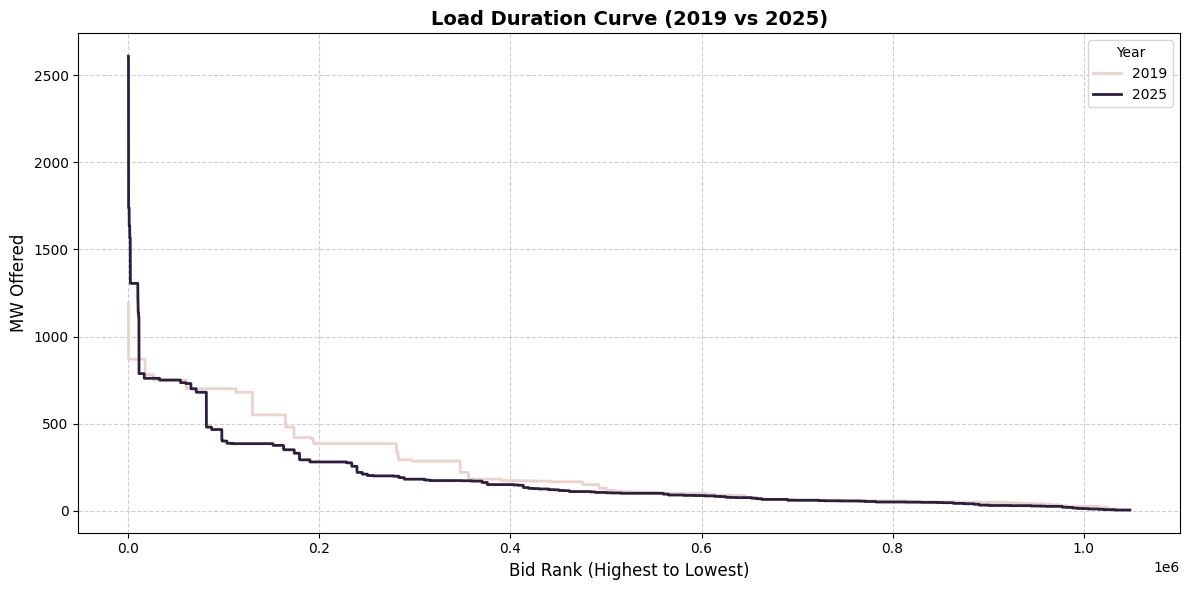

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

sns.lineplot(data=df_ldc, x='Rank', y='Total_BidMW', hue='Year', linewidth=2)

plt.title('Load Duration Curve (2019 vs 2025)', fontsize=14, fontweight='bold')
plt.xlabel('Bid Rank (Highest to Lowest)', fontsize=12)
plt.ylabel('MW Offered', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


This graph visualizes the distribution and consistency of MW offered across the bid stack, ranked from highest to lowest offer. It helps reveal how much generation is available most of the time vs only during peak periods, and how that profile has shifted from 2019 to 2025.

Steeper curve in 2025 at the high-MW end suggests more peaky or short-term capacity being offered—likely from flexible but expensive generators like OCGT or peaker plants.

Flatter tail in 2025 compared to 2019 indicates a more consistent baseline supply, possibly due to increased solar generation or improved bid distribution.

In the mid-rank region, 2025 shows slightly less capacity offered than 2019, hinting at reduced mid-merit bids, possibly due to reduced coal operation or withdrawal of marginal capacity.

Overall, the 2025 curve reflects a shift in the generation mix, with greater reliance on fewer, high-output bids for peak supply and a leaner middle segment.

This change could imply greater price volatility, as the market depends more on a narrow band of high-output units during demand spikes.

<Figure size 1000x600 with 0 Axes>

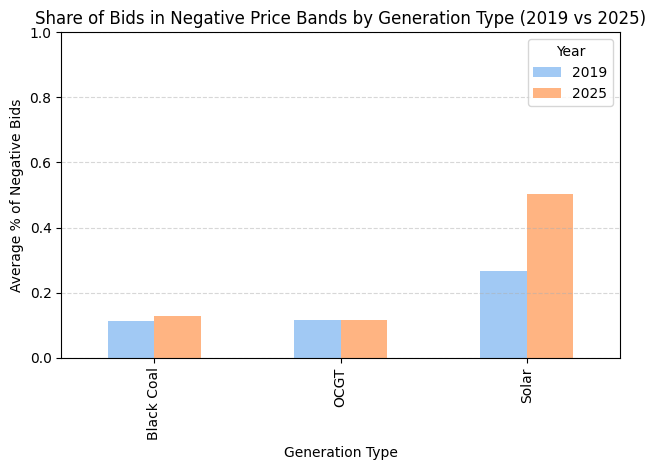

In [37]:
# 4. Share of Bids in Negative Price Bands
import pandas as pd
import matplotlib.pyplot as plt

# List of price bands to check
price_cols = [col for col in df_2019.columns if 'PRICEBAND' in col]

def calculate_negative_bid_share(df, year):
    df = df.copy()
    df['Negative_Count'] = df[price_cols].lt(0).sum(axis=1)
    df['Total_Bids'] = df[price_cols].notna().sum(axis=1)
    df['Negative_Share'] = df['Negative_Count'] / df['Total_Bids']
    
    grouped = df.groupby('Generation Type')['Negative_Share'].mean().reset_index()
    grouped['Year'] = year
    return grouped

# Calculate for both years
neg_2019 = calculate_negative_bid_share(df_2019, 2019)
neg_2025 = calculate_negative_bid_share(df_2025, 2025)

# Combine
neg_combined = pd.concat([neg_2019, neg_2025])

# Plot
plt.figure(figsize=(10, 6))
pivot_data = neg_combined.pivot(index='Generation Type', columns='Year', values='Negative_Share')
pivot_data.plot(kind='bar', stacked=False, color=['#A1C9F4', '#FFB482'])

plt.title("Share of Bids in Negative Price Bands by Generation Type (2019 vs 2025)")
plt.ylabel("Average % of Negative Bids")
plt.xlabel("Generation Type")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Year")
plt.tight_layout()
plt.show()


This graph compares the average proportion of negative price bids by generator type in 2019 and 2025. It highlights how different technologies participate in aggressive bidding, often reflecting oversupply, subsidy incentives (e.g. for renewables), or strategic market behavior.

Solar generation shows the highest and sharpest increase in negative bidding—from ~27% in 2019 to ~51% in 2025.
This signals rising renewable penetration and curtailment pressures, especially during low-demand hours (e.g. midday).

Black Coal's share of negative bids slightly increased, suggesting a mild shift in pricing strategy to remain competitive with cheaper solar during oversupplied periods.

OCGT bids remained constant in the negative range (~11%), indicating these generators are primarily used for peaking and not much affected by negative pricing pressures.

The widening gap between solar and the others in 2025 reflects intensified market cannibalization among renewables, pushing them to bid below zero to stay dispatched.

Overall, the data signals a more aggressive and competitive price environment in 2025—especially driven by solar's dominance and inflexible generation timing.

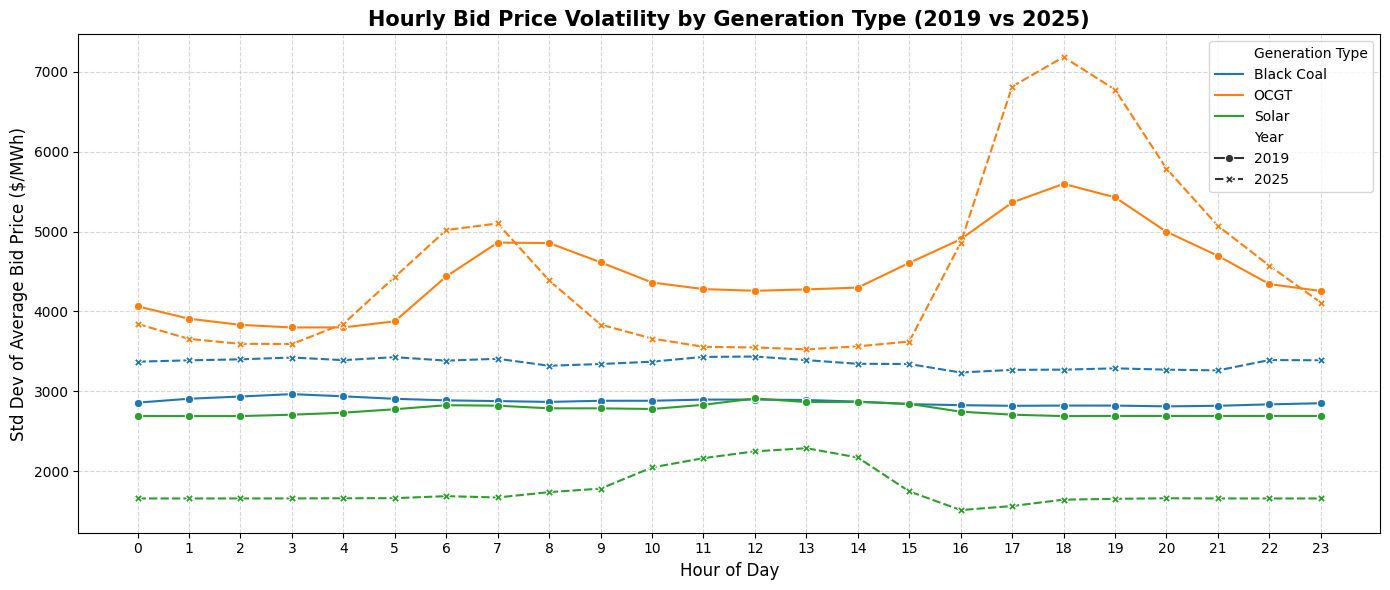

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare each year's data
def prep_volatility_df(df, avg_price_col, year):
    df = df.copy()
    df['Hour'] = pd.to_datetime(df['INTERVAL_DATETIME']).dt.hour
    df['Year'] = year
    return df[['Hour', 'Generation Type', avg_price_col, 'Year']].rename(columns={avg_price_col: 'Avg_Bid_Price'})

df_2019_vol = prep_volatility_df(df_2019, 'Average_Bid_Price_2019', 2019)
df_2025_vol = prep_volatility_df(df_2025, 'Average_Bid_Price_2025', 2025)

# Combine
df_volatility = pd.concat([df_2019_vol, df_2025_vol])

# Group and compute standard deviation
volatility_by_hour = df_volatility.groupby(['Hour', 'Generation Type', 'Year'])['Avg_Bid_Price'].std().reset_index()

# Line plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=volatility_by_hour, x='Hour', y='Avg_Bid_Price', hue='Generation Type', style='Year', markers=True)

plt.title('Hourly Bid Price Volatility by Generation Type (2019 vs 2025)', fontsize=15, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Std Dev of Average Bid Price ($/MWh)', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


This graph visualizes the standard deviation of average bid prices per hour, comparing 2019 to 2025 for each generator type. It highlights how stable or erratic bidding behavior is across the day—and how this has evolved over time.

Key Insights & Findings:


OCGT (gas peakers) show the highest volatility, especially in the late afternoon and early evening hours (e.g. spikes after 16:00 in 2025), indicating flexible, strategic bidding during peak demand windows.

OCGT volatility has increased in 2025, particularly between 17:00–20:00, suggesting these units are responding more aggressively to price signals or tighter market conditions.

Solar's volatility has significantly dropped in 2025, especially during daylight hours, reflecting more predictable output and less price fluctuation—possibly due to increased solar penetration and fixed pricing strategies.

Black Coal maintains stable volatility across both years, indicating its role as a base-load generator with consistent bidding behavior that doesn't shift much intra-day.

The evening peak volatility increase in 2025 is mostly driven by OCGT, which implies rising price uncertainty during net demand peaks, even as solar smooths midday dynamics.

This chart shows that while solar is becoming more predictable, market volatility is shifting toward dispatchable generators like OCGT, especially during critical hours.

In [39]:
# Forcasting
# Summary for 2019 dataset
print("====== DATA SUMMARY: df_2019 ======")
print("🔹 Shape:", df_2019.shape)
print("\n🔹 Column Types:\n", df_2019.dtypes)
print("\n🔹 Missing Values:\n", df_2019.isnull().sum())
print("\n🔹 Descriptive Statistics:\n", df_2019.describe(include='all'))
print("\n🔹 Unique Values per Column:\n", df_2019.nunique())


====== DATA SUMMARY: df_2019 ======
🔹 Shape: (1033968, 39)

🔹 Column Types:
 INTERVAL_DATETIME            datetime64[ns]
DUID                                 object
PRICEBAND1                          float64
PRICEBAND2                          float64
PRICEBAND3                          float64
PRICEBAND4                          float64
PRICEBAND5                          float64
PRICEBAND6                          float64
PRICEBAND7                          float64
PRICEBAND8                          float64
PRICEBAND9                          float64
PRICEBAND10                         float64
BANDAVAIL1                            int64
BANDAVAIL2                            int64
BANDAVAIL3                            int64
BANDAVAIL4                            int64
BANDAVAIL5                            int64
BANDAVAIL6                            int64
BANDAVAIL7                            int64
BANDAVAIL8                            int64
BANDAVAIL9                            int64

In [40]:
# Summary for 2025 dataset
print("\n====== DATA SUMMARY: df_2025 ======")
print("🔹 Shape:", df_2025.shape)
print("\n🔹 Column Types:\n", df_2025.dtypes)
print("\n🔹 Missing Values:\n", df_2025.isnull().sum())
print("\n🔹 Descriptive Statistics:\n", df_2025.describe(include='all'))
print("\n🔹 Unique Values per Column:\n", df_2025.nunique())



====== DATA SUMMARY: df_2025 ======
🔹 Shape: (1048575, 39)

🔹 Column Types:
 INTERVAL_DATETIME            datetime64[ns]
DUID                                 object
PRICEBAND1                          float64
PRICEBAND2                          float64
PRICEBAND3                          float64
PRICEBAND4                          float64
PRICEBAND5                          float64
PRICEBAND6                          float64
PRICEBAND7                          float64
PRICEBAND8                          float64
PRICEBAND9                          float64
PRICEBAND10                         float64
BANDAVAIL1                            int64
BANDAVAIL2                            int64
BANDAVAIL3                            int64
BANDAVAIL4                            int64
BANDAVAIL5                            int64
BANDAVAIL6                            int64
BANDAVAIL7                            int64
BANDAVAIL8                            int64
BANDAVAIL9                            int6

In [41]:
import pandas as pd

# Combine both datasets with necessary columns
df_2019['Date'] = df_2019['INTERVAL_DATETIME'].dt.date
df_2025['Date'] = df_2025['INTERVAL_DATETIME'].dt.date

df_avg_2019 = df_2019.groupby(['Date', 'Generation Type'])['Average_Bid_Price_2019'].mean().reset_index()
df_avg_2025 = df_2025.groupby(['Date', 'Generation Type'])['Average_Bid_Price_2025'].mean().reset_index()

df_avg_2019.rename(columns={'Average_Bid_Price_2019': 'Average_Bid_Price'}, inplace=True)
df_avg_2025.rename(columns={'Average_Bid_Price_2025': 'Average_Bid_Price'}, inplace=True)

df_all = pd.concat([df_avg_2019, df_avg_2025], ignore_index=True)


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column for combined bid price
df_2019['Average_Bid_Price'] = df_2019['Average_Bid_Price_2019']
df_2025['Average_Bid_Price'] = df_2025['Average_Bid_Price_2025']

# Then combine
df_all = pd.concat([df_2019, df_2025], ignore_index=True)


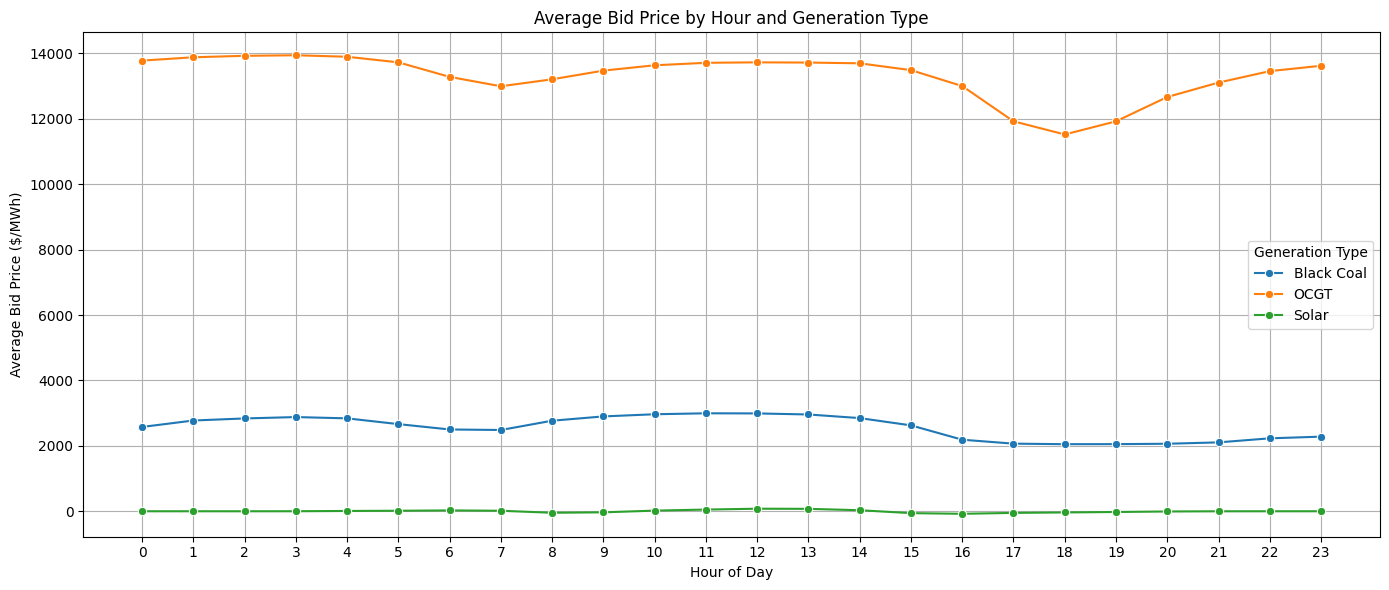

In [44]:
# Group by Hour and Generation Type
hourly_trend = df_all.groupby(['Hour', 'Generation Type'])['Average_Bid_Price'].mean().reset_index()

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.lineplot(data=hourly_trend, x='Hour', y='Average_Bid_Price', hue='Generation Type', marker='o')
plt.title('Average Bid Price by Hour and Generation Type')
plt.xlabel('Hour of Day')
plt.ylabel('Average Bid Price ($/MWh)')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


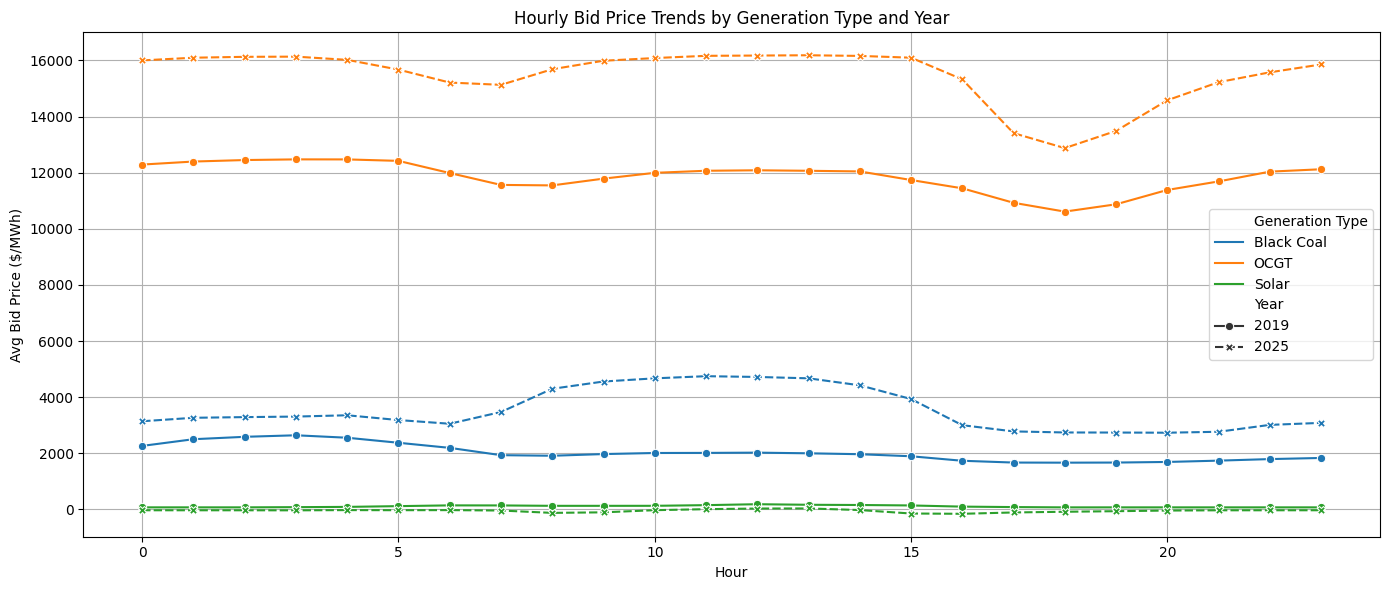

In [45]:
hourly_year = df_all.groupby(['Year', 'Hour', 'Generation Type'])['Average_Bid_Price'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=hourly_year, x='Hour', y='Average_Bid_Price', hue='Generation Type', style='Year', markers=True)
plt.title('Hourly Bid Price Trends by Generation Type and Year')
plt.xlabel('Hour')
plt.ylabel('Avg Bid Price ($/MWh)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Prepare your data
df = df_all.copy()
df['Hour'] = df['INTERVAL_DATETIME'].dt.hour
df['Month'] = df['INTERVAL_DATETIME'].dt.month

# Find the most demanded generation type per row (grouped)
df_grouped = df.groupby(['Region', 'INTERVAL_DATETIME', 'Generation Type'])['Total_BidMW'].sum().reset_index()

# Rank generation types per hour/state by demand
df_grouped['Rank'] = df_grouped.groupby(['Region', 'INTERVAL_DATETIME'])['Total_BidMW'].rank(ascending=False)
df_top = df_grouped[df_grouped['Rank'] == 1]

# Feature engineering
df_top['Hour'] = df_top['INTERVAL_DATETIME'].dt.hour
df_top['Month'] = df_top['INTERVAL_DATETIME'].dt.month

# Encode state and time features for classification
X = df_top[['Region', 'Hour', 'Month']]
y = df_top['Generation Type']

X = pd.get_dummies(X)  # one-hot encoding

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


C:\Users\albin\AppData\Local\Temp\ipykernel_14300\3117409961.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['Hour'] = df_top['INTERVAL_DATETIME'].dt.hour
C:\Users\albin\AppData\Local\Temp\ipykernel_14300\3117409961.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['Month'] = df_top['INTERVAL_DATETIME'].dt.month


              precision    recall  f1-score   support

  Black Coal       1.00      1.00      1.00      8414
        OCGT       1.00      1.00      1.00     12754

    accuracy                           1.00     21168
   macro avg       1.00      1.00      1.00     21168
weighted avg       1.00      1.00      1.00     21168



In [47]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Feature prep
df = df_all.copy()
df['Hour'] = df['INTERVAL_DATETIME'].dt.hour
df['Month'] = df['INTERVAL_DATETIME'].dt.month

# Group and rank to find dominant generation type per state/hour
grouped = df.groupby(['Region', 'INTERVAL_DATETIME', 'Generation Type'])['Total_BidMW'].sum().reset_index()
grouped['Rank'] = grouped.groupby(['Region', 'INTERVAL_DATETIME'])['Total_BidMW'].rank(ascending=False)

# Keep only top-ranked generation type (most in demand per state/hour)
top_gen = grouped[grouped['Rank'] == 1]

# Extract time features again
top_gen['Hour'] = top_gen['INTERVAL_DATETIME'].dt.hour
top_gen['Month'] = top_gen['INTERVAL_DATETIME'].dt.month

# Features and target
X_cls = top_gen[['Region', 'Hour', 'Month']]
y_cls = top_gen['Generation Type']

X_cls = pd.get_dummies(X_cls)

# Train-test split
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_cls, y_cls, test_size=0.3, random_state=42)

# Classification model
clf = RandomForestClassifier()
clf.fit(Xc_train, yc_train)

# Evaluate
y_pred_cls = clf.predict(Xc_test)
print("🔹 Classification Report:")
print(classification_report(yc_test, y_pred_cls))


C:\Users\albin\AppData\Local\Temp\ipykernel_14300\2142656977.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_gen['Hour'] = top_gen['INTERVAL_DATETIME'].dt.hour
C:\Users\albin\AppData\Local\Temp\ipykernel_14300\2142656977.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_gen['Month'] = top_gen['INTERVAL_DATETIME'].dt.month


🔹 Classification Report:
              precision    recall  f1-score   support

  Black Coal       1.00      1.00      1.00      8414
        OCGT       1.00      1.00      1.00     12754

    accuracy                           1.00     21168
   macro avg       1.00      1.00      1.00     21168
weighted avg       1.00      1.00      1.00     21168



In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Prepare data: total MW per state/hour/gen type
reg_data = df.copy()
reg_data['Hour'] = reg_data['INTERVAL_DATETIME'].dt.hour
reg_data['Month'] = reg_data['INTERVAL_DATETIME'].dt.month

# Aggregate for hourly demand by gen type and state
reg_df = reg_data.groupby(['Region', 'Hour', 'Month', 'Generation Type'])['Total_BidMW'].sum().reset_index()

# Encode categorical variables
X_reg = pd.get_dummies(reg_df[['Region', 'Hour', 'Month', 'Generation Type']])
y_reg = reg_df['Total_BidMW']

# Train-test split
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Train regression model
regr = RandomForestRegressor()
regr.fit(Xr_train, yr_train)

# Predict and evaluate
y_pred_reg = regr.predict(Xr_test)
mse = mean_squared_error(yr_test, y_pred_reg)
print(f"🔹 Regression MSE: {mse:.2f}")


🔹 Regression MSE: 2485034274.80


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report

# Load your combined dataset
df = pd.concat([df_2019, df_2025], ignore_index=True)

# Drop any rows with missing data in key columns
df = df.dropna(subset=['Total_BidMW', 'Region', 'Generation Type'])


In [53]:
df_2019

,INTERVAL_DATETIME,DUID,PRICEBAND1,PRICEBAND2,PRICEBAND3,PRICEBAND4,PRICEBAND5,PRICEBAND6,PRICEBAND7,PRICEBAND8,...,weighted_price_5,weighted_price_6,weighted_price_7,weighted_price_8,weighted_price_9,weighted_price_10,Weighted_Total_Price_2019,Average_Bid_Price_2019,Date,Average_Bid_Price
0,2019-04-01 04:05:00,CG1,-982.70,0.00,47.66,75.29,94.36,284.98,427.96,2192.18,...,0.00,0.0,0.0,0.0,0.0,2579096.15,2579096.15,14249.150000,2019-04-01,14249.150000
1,2019-04-01 04:05:00,QPS5,-985.40,62.74,97.58,111.38,122.40,147.58,373.38,569.64,...,0.00,0.0,0.0,0.0,0.0,1828902.40,1828902.40,14288.300000,2019-04-01,14288.300000
2,2019-04-01 04:05:00,TARONG#1,-975.20,24.12,47.74,58.46,63.17,81.43,102.91,140.95,...,3158.50,1628.6,0.0,0.0,0.0,707020.00,494725.50,1285.001299,2019-04-01,1285.001299
3,2019-04-01 04:05:00,BDL01,-1028.23,63.75,83.29,88.43,93.57,98.71,113.11,257.06,...,1964.97,0.0,0.0,0.0,0.0,89456.04,70856.41,1507.583191,2019-04-01,1507.583191
4,2019-04-01 04:05:00,BNGSF1,-970.00,-147.25,-87.30,-58.68,0.00,48.40,67.71,84.78,...,0.00,0.0,0.0,0.0,0.0,0.00,-106700.00,-970.000000,2019-04-01,-970.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033963,2019-05-01 04:00:00,LD01,-953.70,0.00,65.82,82.99,114.45,274.68,425.36,1335.19,...,0.00,0.0,0.0,0.0,0.0,3457162.50,3218737.50,5852.250000,2019-05-01,5852.250000
1033964,2019-05-01 04:00:00,BW03,-955.50,0.00,24.35,50.18,65.38,87.77,107.42,140.25,...,1307.60,1755.4,2148.4,2805.0,0.0,2008932.95,1786855.85,2552.651214,2019-05-01,2552.651214
1033965,2019-05-01 04:00:00,BBTHREE1,-999.84,-69.56,-0.54,13.40,95.21,103.67,109.89,269.10,...,0.00,0.0,0.0,0.0,16190.4,130539.15,146729.55,2994.480612,2019-05-01,2994.480612
1033966,2019-05-01 04:00:00,AGLHAL,-971.50,0.00,270.86,358.30,406.87,484.59,562.31,1326.64,...,0.00,0.0,33738.6,0.0,0.0,2176003.20,2209741.80,10044.280909,2019-05-01,10044.280909


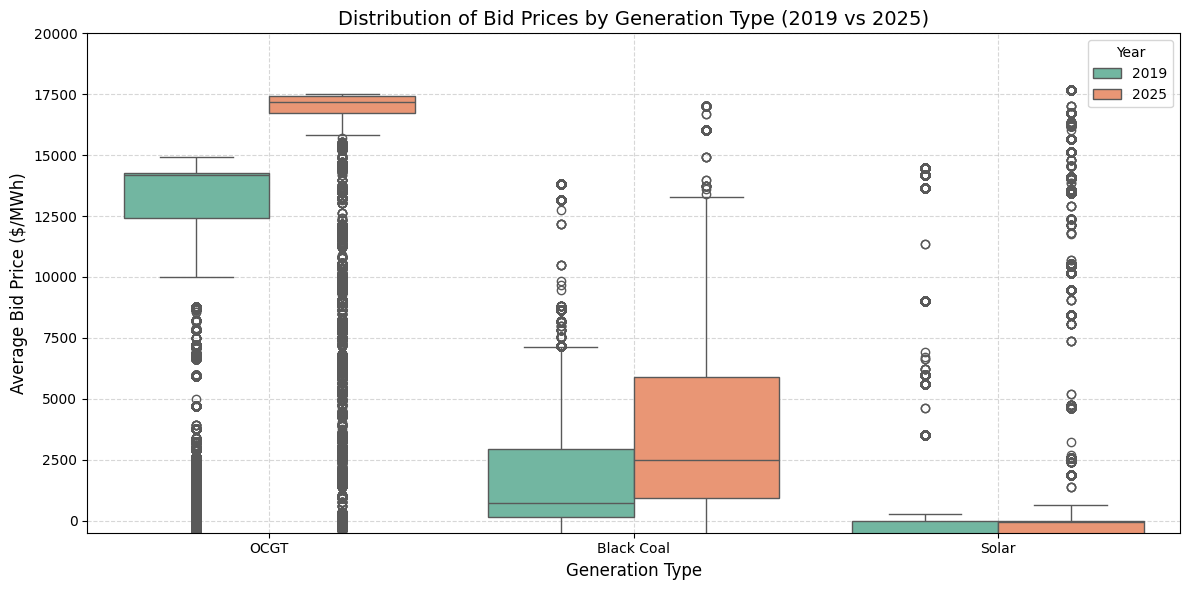

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare the combined DataFrame
df_2019['Year'] = 2019
df_2025['Year'] = 2025

# Rename price columns to the same name
df_2019_renamed = df_2019[['Generation Type', 'Average_Bid_Price_2019', 'Year']].rename(columns={'Average_Bid_Price_2019': 'Average_Bid_Price'})
df_2025_renamed = df_2025[['Generation Type', 'Average_Bid_Price_2025', 'Year']].rename(columns={'Average_Bid_Price_2025': 'Average_Bid_Price'})

# Combine
df_combined_box = pd.concat([df_2019_renamed, df_2025_renamed], ignore_index=True)

# Step 2: Plot combined boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_combined_box,
    x='Generation Type',
    y='Average_Bid_Price',
    hue='Year',
    palette='Set2'
)

plt.title('Distribution of Bid Prices by Generation Type (2019 vs 2025)', fontsize=14)
plt.ylabel('Average Bid Price ($/MWh)', fontsize=12)
plt.xlabel('Generation Type', fontsize=12)
plt.ylim(-500, 20000)  # consistent y-axis scale for fair comparison
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title='Year')
plt.show()


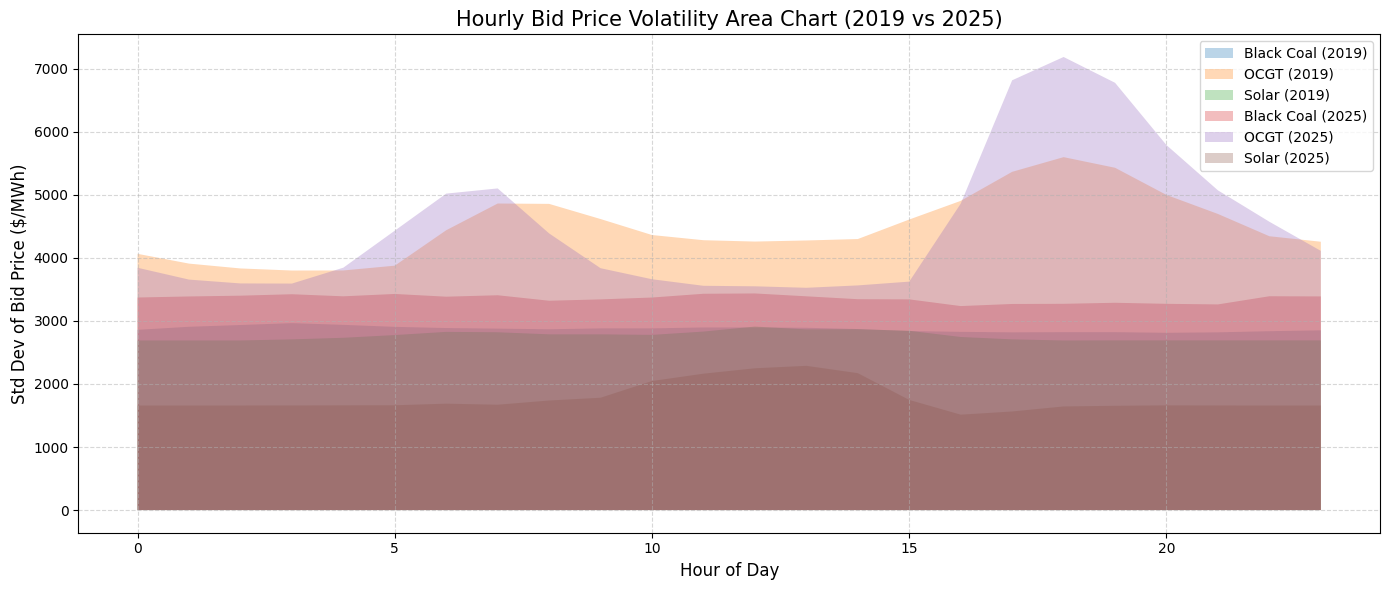

In [55]:
plt.figure(figsize=(14, 6))
for year in [2019, 2025]:
    subset = volatility_by_hour[volatility_by_hour['Year'] == year]
    for gen_type in subset['Generation Type'].unique():
        gen_data = subset[subset['Generation Type'] == gen_type]
        plt.fill_between(gen_data['Hour'], gen_data['Avg_Bid_Price'], alpha=0.3, label=f'{gen_type} ({year})')

plt.title('Hourly Bid Price Volatility Area Chart (2019 vs 2025)', fontsize=15)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Std Dev of Bid Price ($/MWh)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


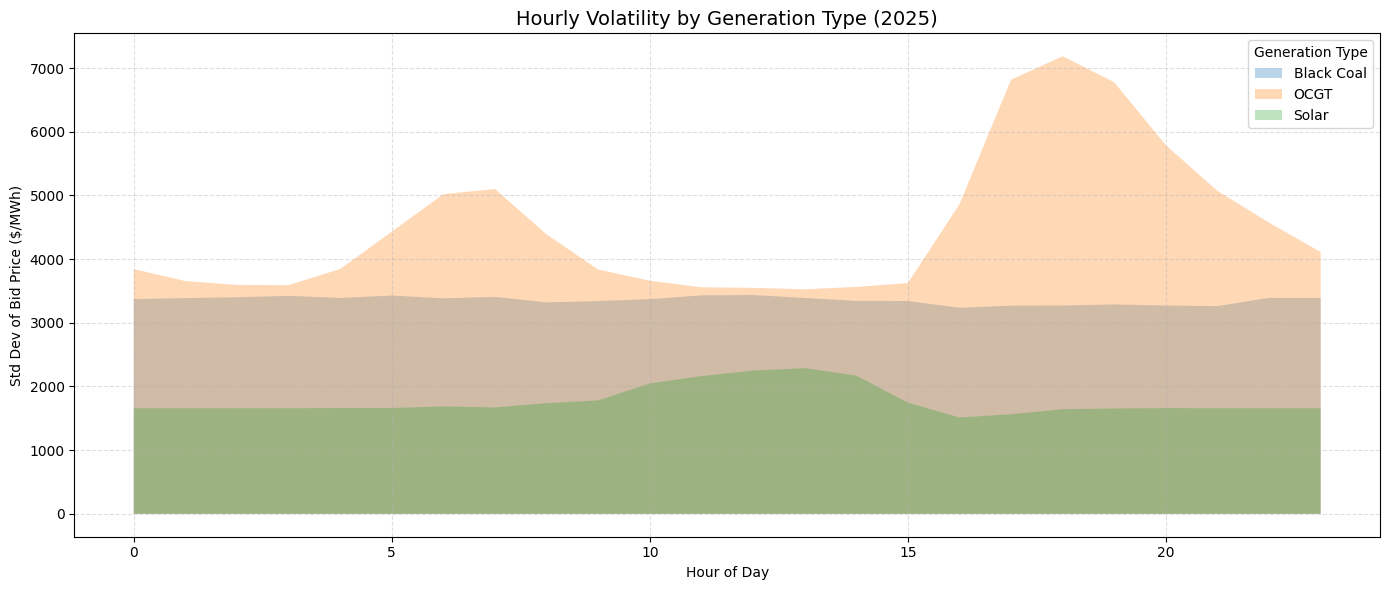

In [56]:
plt.figure(figsize=(14, 6))
for gen_type in volatility_by_hour['Generation Type'].unique():
    subset = volatility_by_hour[(volatility_by_hour['Generation Type'] == gen_type) & (volatility_by_hour['Year'] == 2025)]
    plt.fill_between(subset['Hour'], subset['Avg_Bid_Price'], label=gen_type, alpha=0.3)

plt.title('Hourly Volatility by Generation Type (2025)', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Std Dev of Bid Price ($/MWh)')
plt.legend(title='Generation Type')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


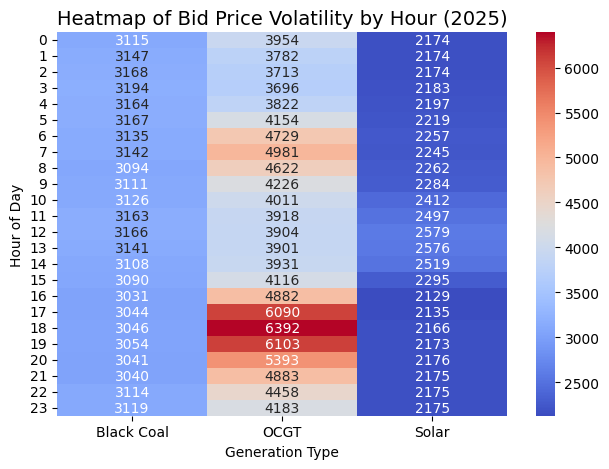

In [57]:
pivot_table = volatility_by_hour.pivot_table(index='Hour', columns='Generation Type', values='Avg_Bid_Price')
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".0f")
plt.title('Heatmap of Bid Price Volatility by Hour (2025)', fontsize=14)
plt.xlabel('Generation Type')
plt.ylabel('Hour of Day')
plt.tight_layout()
plt.show()


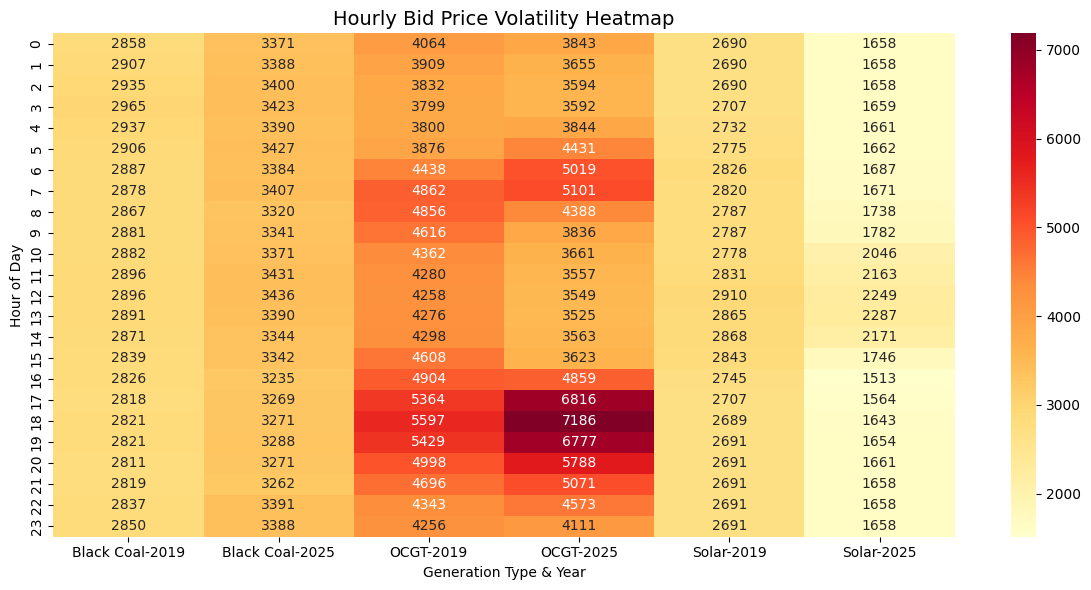

In [58]:
pivot = volatility_by_hour.pivot_table(
    index='Hour',
    columns=['Generation Type', 'Year'],
    values='Avg_Bid_Price'
)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap="YlOrRd", annot=True, fmt=".0f")
plt.title("Hourly Bid Price Volatility Heatmap", fontsize=14)
plt.ylabel("Hour of Day")
plt.xlabel("Generation Type & Year")
plt.tight_layout()
plt.show()


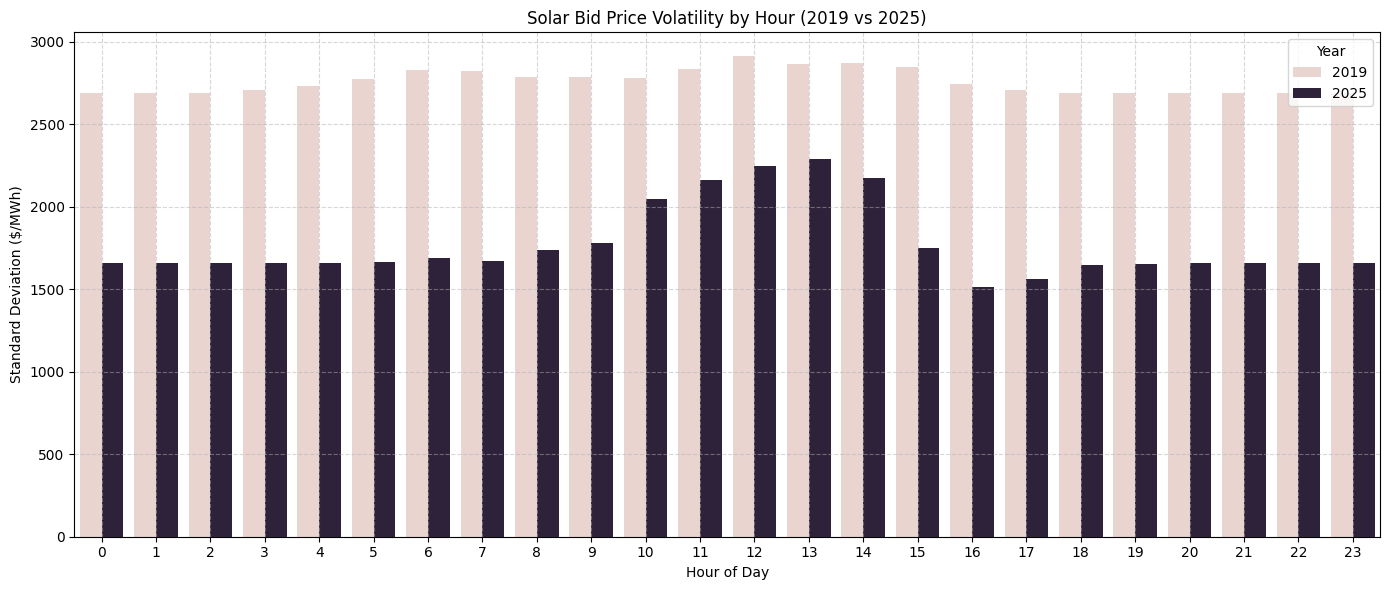

In [59]:
solar_vol = volatility_by_hour[volatility_by_hour['Generation Type'] == 'Solar']

plt.figure(figsize=(14, 6))
sns.barplot(data=solar_vol, x='Hour', y='Avg_Bid_Price', hue='Year')
plt.title('Solar Bid Price Volatility by Hour (2019 vs 2025)')
plt.xlabel('Hour of Day')
plt.ylabel('Standard Deviation ($/MWh)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


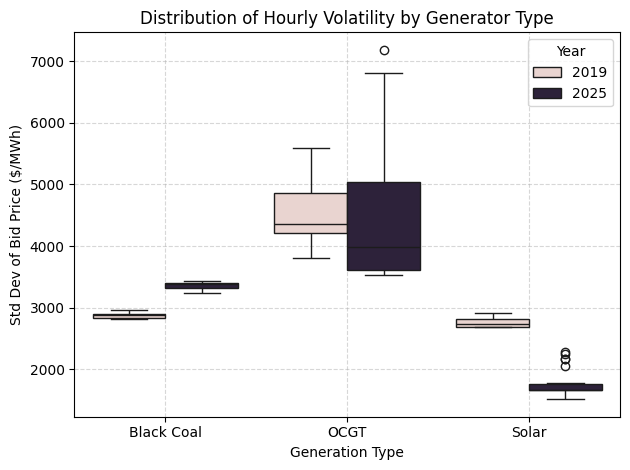

In [60]:
sns.boxplot(data=volatility_by_hour, x='Generation Type', y='Avg_Bid_Price', hue='Year')
plt.title('Distribution of Hourly Volatility by Generator Type')
plt.ylabel('Std Dev of Bid Price ($/MWh)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Text(0.5, 0.98, 'Volatility by Generation Type (2019 vs 2025)')

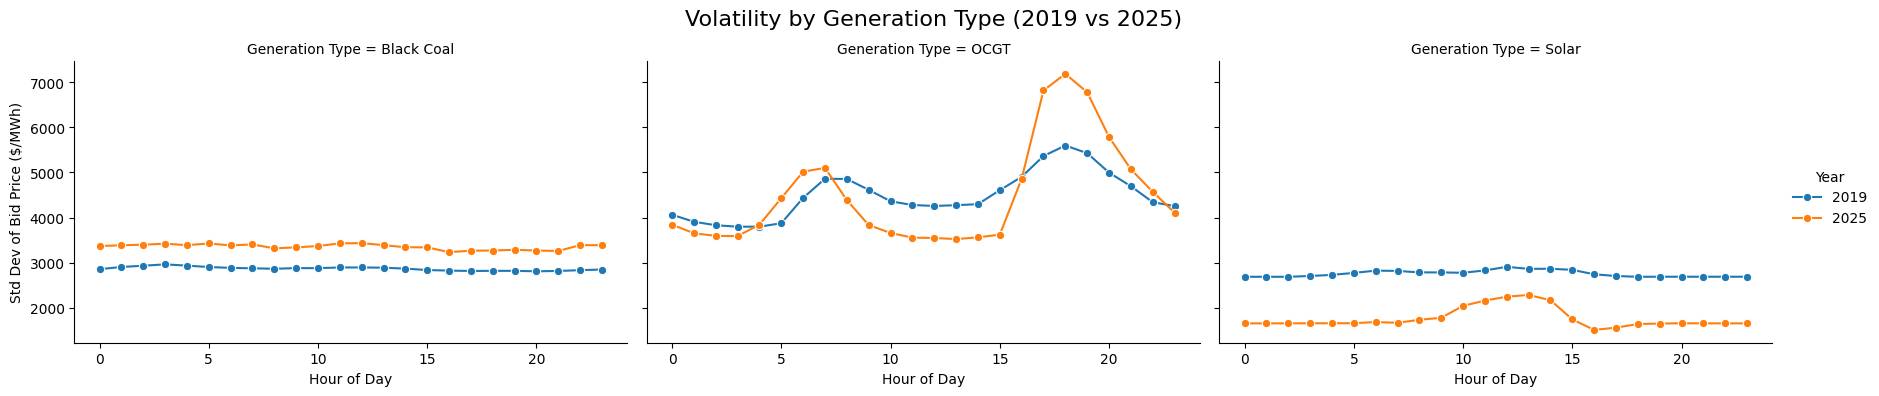

In [61]:
g = sns.FacetGrid(volatility_by_hour, col="Generation Type", hue="Year", height=4, aspect=1.5)
g.map(sns.lineplot, "Hour", "Avg_Bid_Price", marker='o')
g.add_legend()
g.set_axis_labels("Hour of Day", "Std Dev of Bid Price ($/MWh)")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Volatility by Generation Type (2019 vs 2025)', fontsize=16)
